In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit=pd.read_csv(r"Credit Bureau data.csv", encoding='latin-1')
demo=pd.read_csv(r"Demographic data.csv", encoding='latin-1')

####Feature Names are very long so we replaced with shortend names
name_credit={"Application ID":"app_id","No of times 90 DPD or worse in last 6 months":"dpd_90_6",
 "No of times 60 DPD or worse in last 6 months":"dpd_60_6","No of times 30 DPD or worse in last 6 months":"dpd_30_6",
"No of times 90 DPD or worse in last 12 months":"dpd_90_12","No of times 60 DPD or worse in last 12 months":"dpd_60_12",
"No of times 30 DPD or worse in last 12 months":"dpd_30_12","Avgas CC Utilization in last 12 months":"util_12",
"No of trades opened in last 6 months":"trad_6","No of trades opened in last 12 months":"trad_12",
"No of PL trades opened in last 6 months":"pl_trad_6","No of PL trades opened in last 12 months":"pl_trad_12",
"No of Inquiries in last 6 months (excluding home & auto loans)":"inqu_6","No of Inquiries in last 12 months (excluding home & auto loans)":"inqu_12",
"Presence of open home loan":"open_hl","Outstanding Balance":"out_bal","Total No of Trades":"total_no_trad",
"Presence of open auto loan":"open_al","Performance Tag":"perf_tag"}

name_demo={"Application ID":"app_id","Age":"age","Gender":"gender","Marital Status (at the time of application)":"marital_status",
"No of dependents":"no_dependent","Income":"income","Education":"education","Profession ":"profession",
"Type of residence":"type_res","No of months in current residence":"month_res",
"No of months in current company":"month_comp","Performance Tag":"perf_tag_dm"}

### renaming the columns with shorter names
credit.rename(columns=name_credit, inplace=True)
demo.rename(columns=name_demo, inplace=True)
print(credit.isna().sum())
print(demo.isna().sum())

app_id              0
dpd_90_6            0
dpd_60_6            0
dpd_30_6            0
dpd_90_12           0
dpd_60_12           0
dpd_30_12           0
util_12          1058
trad_6              1
trad_12             0
pl_trad_6           0
pl_trad_12          0
inqu_6              0
inqu_12             0
open_hl           272
out_bal           272
total_no_trad       0
open_al             0
perf_tag         1425
dtype: int64
app_id               0
age                  0
gender               2
marital_status       6
no_dependent         3
income               0
education          119
profession          14
type_res             8
month_res            0
month_comp           0
perf_tag_dm       1425
dtype: int64


In [3]:
###there are 3 duplicates so those should be dropped
demo.drop_duplicates("app_id", inplace=True)
credit.drop_duplicates("app_id", inplace=True)

###there are some records, where util_12 is missing and all other parameters are 0, which means 
###those customers either did not hit the credit bureau because they didnt use card
credit_no_hit_no_card = credit[(credit.dpd_90_6 == 0) & (credit.dpd_60_6 == 0) & (credit.dpd_30_6 == 0)
                              &(credit.dpd_90_12 == 0) & (credit.dpd_60_12 == 0) & (credit.dpd_30_12 == 0)
                              &(credit.trad_6 == 0) & (credit.trad_12 == 0) & (credit.pl_trad_6 == 0)
                              &(credit.pl_trad_12 == 0) & (credit.inqu_6 == 0) & (credit.inqu_12 == 0)
                              &(credit.open_hl == 0) & (credit.out_bal == 0) & (credit.total_no_trad == 0)
                              &(credit.open_al== 0) &(credit.perf_tag== 0) ]
credit_no_hit_no_card.fillna(0, inplace=True)
credit.drop(credit_no_hit_no_card.index, inplace=True)
credit=pd.concat([credit,credit_no_hit_no_card])

###in some cases util_12 is Missing, indicating they do not have credit card so there utilisation must be zero
### so the out_bal  as they do not have card
credit.util_12.fillna(0, inplace=True)
credit.out_bal.fillna(0, inplace=True)

### open_hl is also NA in same records where out_bal is NA so
### open_hl can be replaced with Zero
credit.open_hl.fillna(0, inplace=True)

###merging the two datasets on "app_id"
crdemo=pd.merge(demo,credit, on='app_id')

###shortending category names in "type of residence"
crdemo.replace(["Living with Parents","Company provided"], ["parental","company"], inplace=True)
len(crdemo)

71292

In [4]:
crdemo.isna().sum()

app_id               0
age                  0
gender               2
marital_status       6
no_dependent         3
income               0
education          119
profession          14
type_res             8
month_res            0
month_comp           0
perf_tag_dm       1425
dpd_90_6             0
dpd_60_6             0
dpd_30_6             0
dpd_90_12            0
dpd_60_12            0
dpd_30_12            0
util_12              0
trad_6               1
trad_12              0
pl_trad_6            0
pl_trad_12           0
inqu_6               0
inqu_12              0
open_hl              0
out_bal              0
total_no_trad        0
open_al              0
perf_tag          1425
dtype: int64

In [5]:
print(crdemo.info())
crdemo.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71291
Data columns (total 30 columns):
app_id            71292 non-null int64
age               71292 non-null int64
gender            71290 non-null object
marital_status    71286 non-null object
no_dependent      71289 non-null float64
income            71292 non-null float64
education         71173 non-null object
profession        71278 non-null object
type_res          71284 non-null object
month_res         71292 non-null int64
month_comp        71292 non-null int64
perf_tag_dm       69867 non-null float64
dpd_90_6          71292 non-null int64
dpd_60_6          71292 non-null int64
dpd_30_6          71292 non-null int64
dpd_90_12         71292 non-null int64
dpd_60_12         71292 non-null int64
dpd_30_12         71292 non-null int64
util_12           71292 non-null float64
trad_6            71291 non-null float64
trad_12           71292 non-null int64
pl_trad_6         71292 non-null int64
pl_trad_12        

app_id  age gender marital_status  no_dependent  income     education  \
0  954457215   48      F        Married           2.0    40.0      Bachelor   
1  432830445   31      M        Married           4.0    55.0  Professional   
2  941387308   32      M         Single           2.0    46.0      Bachelor   
3  392161677   43      M        Married           1.0    53.0      Bachelor   
4  182011211   35      F        Married           5.0    44.0  Professional   

  profession type_res  month_res  ...  trad_12  pl_trad_6  pl_trad_12  inqu_6  \
0        SAL   Rented        113  ...        2          0           0       0   
1    SE_PROF   Rented        112  ...        2          0           0       0   
2    SE_PROF   Rented        104  ...        0          0           0       0   
3         SE   Rented         94  ...        1          0           0       0   
4        SAL   Rented        112  ...        1          0           0       0   

   inqu_12  open_hl    out_bal  total_no_trad  open_al  perf_tag  
0        0      1.0  2999395.0              4        0       0.0  
1        0      0.0     3078.0              5        0       0.0  
2        0      1.0  3004972.0              2        0       0.0  
3        0      1.0  3355373.0              4        1       0.0  
4        0      1.0  3014283.0              4        0       0.0  

[5 rows x 30 columns]

In [6]:
### check the counts in each category in each column
## and coutns of NUlls 
for i in crdemo.columns:
    printmd("**Counts for each category in varible ==**"+ i)
    print("    ")
    print("NUll   ", (len(crdemo) - crdemo[i].value_counts().sum()))
    print(crdemo[i].value_counts())
    print("    ")

**Counts for each category in varible ==**app_id

    
NUll    0
426119166    1
329194358    1
407526217    1
675138412    1
641588078    1
628923610    1
1909617      1
217779626    1
788206455    1
963296130    1
582968185    1
587953019    1
595936125    1
217275262    1
637752191    1
55225216     1
739351398    1
790594405    1
540128099    1
862174050    1
436839265    1
348892000    1
328223580    1
782653484    1
6926430      1
804154200    1
803398876    1
608567819    1
441375439    1
712784722    1
            ..
660092396    1
483266027    1
205653482    1
425336297    1
321938918    1
221543909    1
289830372    1
575288465    1
303111182    1
292248325    1
736465905    1
10724830     1
563852764    1
73638052     1
878667206    1
45848024     1
676660998    1
581428694    1
722861525    1
388410817    1
449435088    1
360787407    1
645511588    1
48053709     1
217255371    1
342296010    1
175054281    1
872355272    1
752639131    1
626655232    1
Name: app_id, Length: 71292, dtype: int64
    


**Counts for each category in varible ==**age

    
NUll    0
 39    2543
 42    2398
 43    2395
 37    2394
 40    2391
 38    2371
 51    2367
 46    2345
 41    2339
 47    2336
 44    2321
 36    2320
 48    2311
 52    2298
 50    2297
 53    2294
 54    2289
 45    2278
 49    2260
 56    2215
 55    2210
 35    1504
 32    1500
 30    1423
 27    1423
 33    1413
 31    1372
 34    1370
 29    1370
 28    1370
 58    1068
 60    1042
 61    1017
 57    1016
 59    1016
 62    1001
 63     979
 65     958
 64     932
 24     114
 25     107
 26     100
 23      42
 22      29
 20      29
 19      24
 18      23
 17      22
 0       19
 21      13
 15      12
 16      11
-3        1
Name: age, dtype: int64
    


**Counts for each category in varible ==**gender

    
NUll    2
M    54453
F    16837
Name: gender, dtype: int64
    


**Counts for each category in varible ==**marital_status

    
NUll    6
Married    60727
Single     10559
Name: marital_status, dtype: int64
    


**Counts for each category in varible ==**no_dependent

    
NUll    3
3.0    16279
1.0    15387
2.0    15289
4.0    12220
5.0    12114
Name: no_dependent, dtype: int64
    


**Counts for each category in varible ==**income

    
NUll    0
 4.5     5231
 31.0    1450
 33.0    1447
 23.0    1443
 26.0    1443
 35.0    1440
 20.0    1438
 17.0    1406
 15.0    1403
 21.0    1398
 6.0     1396
 10.0    1391
 22.0    1390
 37.0    1385
 39.0    1383
 16.0    1376
 29.0    1376
 28.0    1375
 19.0    1372
 32.0    1366
 41.0    1364
 13.0    1363
 11.0    1360
 25.0    1351
 8.0     1349
 44.0    1346
 27.0    1345
 30.0    1343
 9.0     1339
 40.0    1332
         ... 
 7.0     1322
 38.0    1320
 36.0    1318
 14.0    1317
 12.0    1300
 24.0    1300
 45.0    1298
 5.0     1292
 42.0    1256
 46.0     931
 50.0     858
 49.0     857
 47.0     855
 48.0     838
 52.0     660
 55.0     655
 54.0     636
 53.0     625
 51.0     599
 56.0     534
 57.0     512
 59.0     499
 58.0     478
 60.0     449
-0.5       81
 4.0       40
 0.0       26
 3.0       23
 1.0       18
 2.0        9
Name: income, Length: 63, dtype: int64
    


**Counts for each category in varible ==**education

    
NUll    119
Professional    24837
Masters         23970
Bachelor        17697
Phd              4548
Others            121
Name: education, dtype: int64
    


**Counts for each category in varible ==**profession

    
NUll    14
SAL        40438
SE_PROF    16535
SE         14305
Name: profession, dtype: int64
    


**Counts for each category in varible ==**type_res

    
NUll    8
Rented      53394
Owned       14243
parental     1818
company      1630
Others        199
Name: type_res, dtype: int64
    


**Counts for each category in varible ==**month_res

    
NUll    0
6      33965
14       454
8        424
18       423
12       422
10       412
11       408
7        403
29       403
9        402
15       398
33       393
13       392
22       390
40       388
17       386
21       381
16       379
39       378
20       373
35       372
31       372
38       371
45       368
19       368
25       367
27       366
34       364
42       359
30       359
       ...  
110      280
98       280
99       280
115      280
89       279
105      278
69       274
80       272
104      272
90       270
111      269
113      268
108      268
96       266
92       263
97       262
86       257
77       256
87       256
85       249
117      199
122      190
119      185
118      185
120      182
121      176
123      156
126      145
125      141
124      135
Name: month_res, Length: 121, dtype: int64
    


**Counts for each category in varible ==**month_comp

    
NUll    0
3      4956
27     1098
38     1087
44     1081
5      1070
54     1069
40     1069
57     1069
53     1069
43     1062
12     1062
48     1057
24     1056
51     1053
41     1052
55     1051
45     1047
29     1045
13     1041
52     1041
7      1039
58     1038
31     1037
46     1037
19     1036
36     1035
56     1034
39     1034
42     1033
6      1032
       ... 
21      973
47      973
11      942
62      900
60      895
59      885
61      841
71      510
65      510
63      501
64      500
67      494
70      485
69      477
66      474
72      473
68      467
73      461
75      459
74      409
83        1
91        1
126       1
96        1
133       1
98        1
105       1
121       1
123       1
128       1
Name: month_comp, Length: 83, dtype: int64
    


**Counts for each category in varible ==**perf_tag_dm

    
NUll    1425
0.0    66920
1.0     2947
Name: perf_tag_dm, dtype: int64
    


**Counts for each category in varible ==**dpd_90_6

    
NUll    0
0    54867
1    13873
2     2258
3      294
Name: dpd_90_6, dtype: int64
    


**Counts for each category in varible ==**dpd_60_6

    
NUll    0
0    51922
1    11393
2     5412
3     1876
4      597
5       92
Name: dpd_60_6, dtype: int64
    


**Counts for each category in varible ==**dpd_30_6

    
NUll    0
0    50108
1     9609
2     6194
3     3269
4     1389
5      565
6      142
7       16
Name: dpd_30_6, dtype: int64
    


**Counts for each category in varible ==**dpd_90_12

    
NUll    0
0    50539
1    11991
2     6654
3     1672
4      390
5       46
Name: dpd_90_12, dtype: int64
    


**Counts for each category in varible ==**dpd_60_12

    
NUll    0
0    45880
1    12927
2     6695
3     3643
4     1420
5      569
6      148
7       10
Name: dpd_60_12, dtype: int64
    


**Counts for each category in varible ==**dpd_30_12

    
NUll    0
0    44862
1    11502
2     6265
3     4450
4     2309
5     1166
6      549
7      160
8       27
9        2
Name: dpd_30_12, dtype: int64
    


**Counts for each category in varible ==**util_12

    
NUll    0
8.0      3495
9.0      3490
7.0      3388
10.0     3222
113.0    3132
6.0      2978
11.0     2904
12.0     2571
5.0      2497
13.0     2235
4.0      1960
14.0     1812
3.0      1605
15.0     1508
0.0      1289
16.0     1218
2.0      1080
17.0     1079
18.0      936
19.0      798
20.0      699
21.0      691
1.0       652
23.0      602
22.0      589
24.0      568
46.0      551
41.0      545
25.0      538
48.0      530
         ... 
84.0      134
82.0      134
86.0      128
85.0      118
87.0      109
88.0       96
90.0       92
93.0       85
89.0       82
92.0       76
91.0       75
98.0       58
95.0       55
103.0      54
96.0       52
94.0       52
106.0      45
104.0      45
102.0      44
108.0      43
100.0      43
101.0      42
105.0      42
112.0      41
107.0      39
97.0       38
99.0       36
111.0      36
109.0      33
110.0      30
Name: util_12, Length: 114, dtype: int64
    


**Counts for each category in varible ==**trad_6

    
NUll    1
1.0     20250
2.0     12461
0.0     12231
3.0      9850
4.0      6624
5.0      3791
6.0      2349
7.0      1649
8.0      1154
9.0       618
10.0      238
11.0       65
12.0       11
Name: trad_6, dtype: int64
    


**Counts for each category in varible ==**trad_12

    
NUll    0
1     11380
2      9342
0      4957
4      4925
3      4712
5      4657
6      4391
7      4302
8      3995
9      3573
10     2994
11     2293
12     1762
13     1406
14     1124
15     1068
16      992
17      860
18      736
19      612
20      434
21      308
22      218
23      121
24       73
25       34
26       11
27        9
28        3
Name: trad_12, dtype: int64
    


**Counts for each category in varible ==**pl_trad_6

    
NUll    0
0    31193
1    13852
2    13079
3     8320
4     3462
5     1090
6      296
Name: pl_trad_6, dtype: int64
    


**Counts for each category in varible ==**pl_trad_12

    
NUll    0
0     25828
3      8432
4      8272
2      6982
1      6693
5      6485
6      4206
7      2284
8      1178
9       601
10      255
11       66
12       10
Name: pl_trad_12, dtype: int64
    


**Counts for each category in varible ==**inqu_6

    
NUll    0
0     25176
1     13511
2     13349
3      7585
4      4385
5      3019
6      1750
7      1149
8       835
9       425
10      108
Name: inqu_6, dtype: int64
    


**Counts for each category in varible ==**inqu_12

    
NUll    0
0     20593
3      9281
2      8075
4      7491
5      5234
1      3932
6      3766
7      3054
8      2355
9      1777
10     1508
11     1231
12      936
13      789
14      553
15      360
16      212
17       97
18       40
19        6
20        2
Name: inqu_12, dtype: int64
    


**Counts for each category in varible ==**open_hl

    
NUll    0
0.0    53080
1.0    18212
Name: open_hl, dtype: int64
    


**Counts for each category in varible ==**out_bal

    
NUll    0
0.0          1081
2595.0          6
3528.0          6
4295.0          6
2577.0          6
2773.0          6
2918.0          5
7714.0          5
1528.0          5
77.0            5
11005.0         5
5729.0          5
1228.0          5
716.0           5
5571.0          5
5.0             5
4017.0          5
4569.0          5
3305.0          5
1302.0          5
9314.0          5
713.0           5
1494.0          5
5092.0          4
98.0            4
9430.0          4
6482.0          4
2876.0          4
1754.0          4
1477.0          4
             ... 
2952510.0       1
2952512.0       1
1476261.0       1
2952524.0       1
3141187.0       1
769626.0        1
4441519.0       1
2952655.0       1
1738469.0       1
2952647.0       1
738160.0        1
1000303.0       1
607085.0        1
3344014.0       1
558579.0        1
607079.0        1
2952601.0       1
2952598.0       1
2952592.0       1
3125241.0       1
1214142.0       1
2952571.0       1
2952567.0       1
2952560.0    

**Counts for each category in varible ==**total_no_trad

    
NUll    0
3     8638
4     7540
2     6770
5     5783
6     5083
7     5016
8     4735
9     4082
10    3454
1     2929
11    2661
12    1935
13    1214
0      988
14     740
25     730
23     698
22     693
21     671
24     668
26     639
20     614
27     578
19     538
15     482
28     479
18     443
16     433
29     420
17     396
30     339
31     272
32     199
33     149
34     103
35      71
36      48
37      29
38      11
39       9
40       7
43       2
41       1
42       1
44       1
Name: total_no_trad, dtype: int64
    


**Counts for each category in varible ==**open_al

    
NUll    0
0    65259
1     6033
Name: open_al, dtype: int64
    


**Counts for each category in varible ==**perf_tag

    
NUll    1425
0.0    66920
1.0     2947
Name: perf_tag, dtype: int64
    


In [7]:
###to match the value of performance tags from both datasets
print(crdemo.perf_tag.sum())
print(crdemo.perf_tag_dm.sum())
##as both have same number of 1

2947.0
2947.0


In [8]:
## now we need to check if 1s are for same rows for both tags
## match the values in two performance tag columns
crdemo[crdemo.perf_tag != crdemo.perf_tag_dm][['perf_tag_dm','perf_tag']].sort_values(by='perf_tag').head()

### there are some records where perf_tag is not given, so those records can be considered as rejected 
### and do not have another credit card
### we can replace them by -1 as another category
crdemo.perf_tag.fillna(-1, inplace=True)
crdemo.perf_tag_dm.fillna(-1, inplace=True)

In [9]:
crdemo.education.value_counts()
## we can put NAs in to Others
crdemo.education.fillna('Others', inplace=True)
crdemo.education.value_counts()

Professional    24837
Masters         23970
Bachelor        17697
Phd              4548
Others            240
Name: education, dtype: int64

In [10]:
crdemo.isna().sum().sort_values()

app_id             0
total_no_trad      0
out_bal            0
open_hl            0
inqu_12            0
inqu_6             0
pl_trad_12         0
pl_trad_6          0
trad_12            0
util_12            0
dpd_30_12          0
dpd_60_12          0
dpd_90_12          0
open_al            0
dpd_30_6           0
dpd_90_6           0
perf_tag_dm        0
month_comp         0
month_res          0
education          0
income             0
age                0
dpd_60_6           0
perf_tag           0
trad_6             1
gender             2
no_dependent       3
marital_status     6
type_res           8
profession        14
dtype: int64

In [11]:
## as there are few NA, those records can be dropped
crdemo.dropna(inplace=True)

In [12]:
crdemo.isna().sum().sort_values()

app_id            0
total_no_trad     0
out_bal           0
open_hl           0
inqu_12           0
inqu_6            0
pl_trad_12        0
pl_trad_6         0
trad_12           0
trad_6            0
util_12           0
dpd_30_12         0
dpd_60_12         0
dpd_90_12         0
dpd_30_6          0
dpd_60_6          0
dpd_90_6          0
perf_tag_dm       0
month_comp        0
month_res         0
type_res          0
profession        0
education         0
income            0
no_dependent      0
marital_status    0
gender            0
age               0
open_al           0
perf_tag          0
dtype: int64

In [13]:
crdemo.describe()

app_id           age  no_dependent        income     month_res  \
count  7.125900e+04  71259.000000  71259.000000  71259.000000  71259.000000   
mean   4.989449e+08     44.946379      2.865182     27.197091     34.561136   
std    2.885867e+08      9.935355      1.382297     15.512654     36.760221   
min    1.004500e+05     -3.000000      1.000000     -0.500000      6.000000   
25%    2.483705e+08     37.000000      2.000000     14.000000      6.000000   
50%    4.975639e+08     45.000000      3.000000     27.000000     11.000000   
75%    7.495442e+08     53.000000      4.000000     40.000000     60.000000   
max    1.000084e+09     65.000000      5.000000     60.000000    126.000000   

         month_comp   perf_tag_dm      dpd_90_6      dpd_60_6      dpd_30_6  \
count  71259.000000  71259.000000  71259.000000  71259.000000  71259.000000   
mean      33.959177      0.021373      0.270226      0.430360      0.576966   
std       20.411062      0.246746      0.534091      0.825146      1.074093   
min        3.000000     -1.000000      0.000000      0.000000      0.000000   
25%       16.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       51.000000      0.000000      0.000000      1.000000      1.000000   
max      133.000000      1.000000      3.000000      5.000000      7.000000   

       ...       trad_12     pl_trad_6    pl_trad_12        inqu_6  \
count  ...  71259.000000  71259.000000  71259.000000  71259.000000   
mean   ...      5.826759      1.206795      2.397255      1.763525   
std    ...      5.065523      1.352964      2.420206      1.971456   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      2.000000      0.000000      0.000000      0.000000   
50%    ...      5.000000      1.000000      2.000000      1.000000   
75%    ...      9.000000      2.000000      4.000000      3.000000   
max    ...     28.000000      6.000000     12.000000     10.000000   

            inqu_12       open_hl       out_bal  total_no_trad       open_al  \
count  71259.000000  71259.000000  7.125900e+04   71259.000000  71259.000000   
mean       3.535231      0.255491  1.244489e+06       8.186882      0.084607   
std        3.582444      0.436140  1.278818e+06       7.091518      0.278298   
min        0.000000      0.000000  0.000000e+00       0.000000      0.000000   
25%        0.000000      0.000000  2.095350e+05       3.000000      0.000000   
50%        3.000000      0.000000  7.734720e+05       6.000000      0.000000   
75%        5.000000      1.000000  2.919400e+06      10.000000      0.000000   
max       20.000000      1.000000  5.218801e+06      44.000000      1.000000   

           perf_tag  
count  71259.000000  
mean       0.021373  
std        0.246746  
min       -1.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 25 columns]

In [14]:
##these variables are counts or discrete numbers so we should make them integers from floats
crdemo['open_hl']=crdemo['open_hl'].astype('int64')
crdemo['no_dependent']=crdemo['no_dependent'].astype('int64')
crdemo['income']=crdemo['income'].astype('int64')
crdemo['util_12']=crdemo['util_12'].astype('int64')
crdemo['trad_6']=crdemo['trad_6'].astype('int64')
crdemo['perf_tag']=crdemo['perf_tag'].astype('int64')
crdemo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71259 entries, 0 to 71291
Data columns (total 30 columns):
app_id            71259 non-null int64
age               71259 non-null int64
gender            71259 non-null object
marital_status    71259 non-null object
no_dependent      71259 non-null int64
income            71259 non-null int64
education         71259 non-null object
profession        71259 non-null object
type_res          71259 non-null object
month_res         71259 non-null int64
month_comp        71259 non-null int64
perf_tag_dm       71259 non-null float64
dpd_90_6          71259 non-null int64
dpd_60_6          71259 non-null int64
dpd_30_6          71259 non-null int64
dpd_90_12         71259 non-null int64
dpd_60_12         71259 non-null int64
dpd_30_12         71259 non-null int64
util_12           71259 non-null int64
trad_6            71259 non-null int64
trad_12           71259 non-null int64
pl_trad_6         71259 non-null int64
pl_trad_12        71259 no

In [15]:
###dropping impossible values such age 0 or -3
### as mostly banks provide credit cards above the age of 18 so we can drop records where age is less than 18
crdemo=crdemo[crdemo["income"] >= 0]
crdemo=crdemo[crdemo["age"] > 18]
crdemo_final=crdemo.copy()

##as app_id is just identity number so we should drop it
crdemo=crdemo.drop(['app_id','perf_tag_dm'], axis=1)


crdemo.shape

(71174, 28)

In [16]:
crdemo.head()

age gender marital_status  no_dependent  income     education profession  \
0   48      F        Married             2      40      Bachelor        SAL   
1   31      M        Married             4      55  Professional    SE_PROF   
2   32      M         Single             2      46      Bachelor    SE_PROF   
3   43      M        Married             1      53      Bachelor         SE   
4   35      F        Married             5      44  Professional        SAL   

  type_res  month_res  month_comp  ...  trad_12  pl_trad_6  pl_trad_12  \
0   Rented        113          56  ...        2          0           0   
1   Rented        112          46  ...        2          0           0   
2   Rented        104          49  ...        0          0           0   
3   Rented         94          53  ...        1          0           0   
4   Rented        112          43  ...        1          0           0   

   inqu_6  inqu_12  open_hl    out_bal  total_no_trad  open_al  perf_tag  
0       0        0        1  2999395.0              4        0         0  
1       0        0        0     3078.0              5        0         0  
2       0        0        1  3004972.0              2        0         0  
3       0        0        1  3355373.0              4        1         0  
4       0        0        1  3014283.0              4        0         0  

[5 rows x 28 columns]

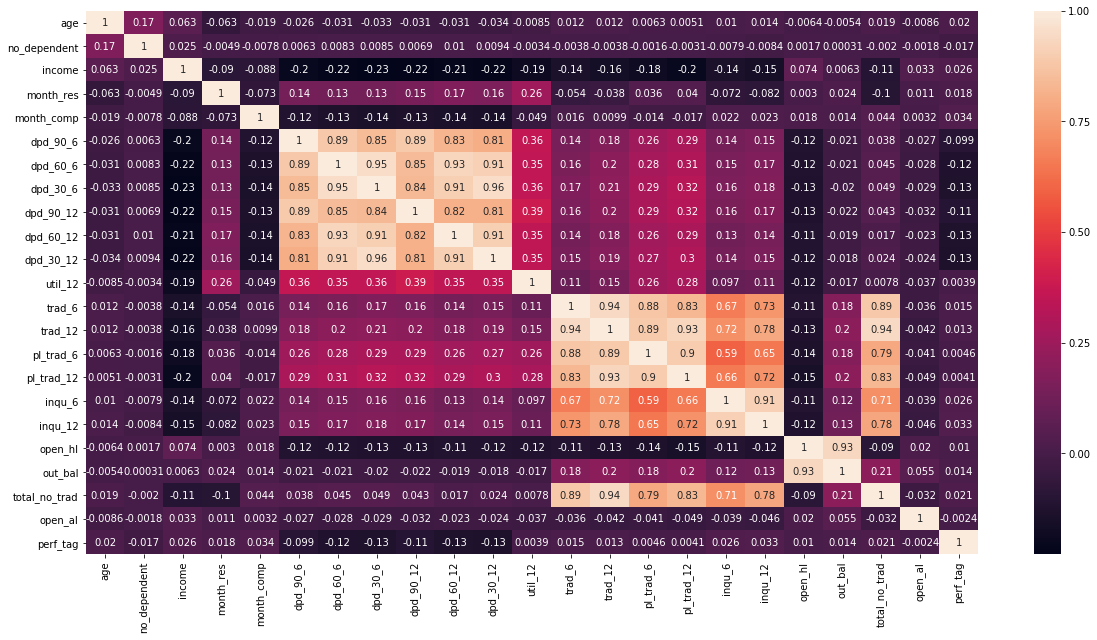

In [17]:
#correlation heatmap
corrr=pd.DataFrame(data=crdemo, columns=list(crdemo.columns)) 
plt.figure(figsize=(20,10))
sns.heatmap(corrr.corr(), annot=True)
#plt.savefig("correlation")
plt.show()

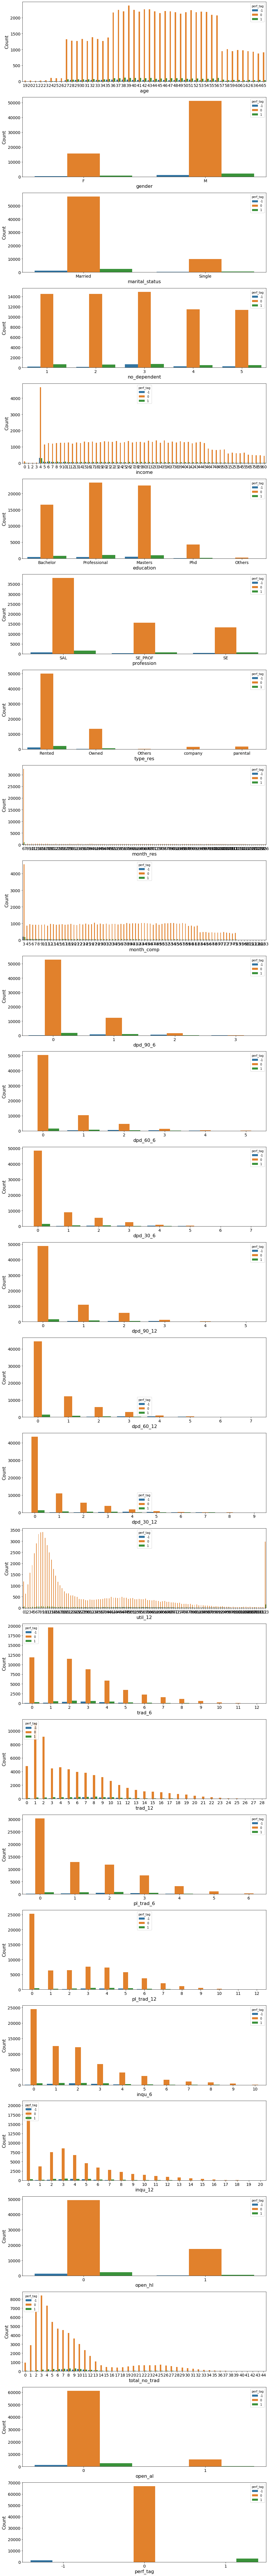

In [18]:
###visualising the distribution of each variable
obj=list(crdemo.select_dtypes(["object", 'int64']))
l=np.arange(len(obj))
fig=plt.figure(figsize=(15,6*len(l)))
for i,m in zip(obj,l):
        plt.subplot(len(l),1,(m+1))
        sns.countplot(i,hue='perf_tag', data=crdemo)
        plt.xlabel(i, fontsize=16)
        plt.ylabel('Count', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
#plt.savefig("object_int")

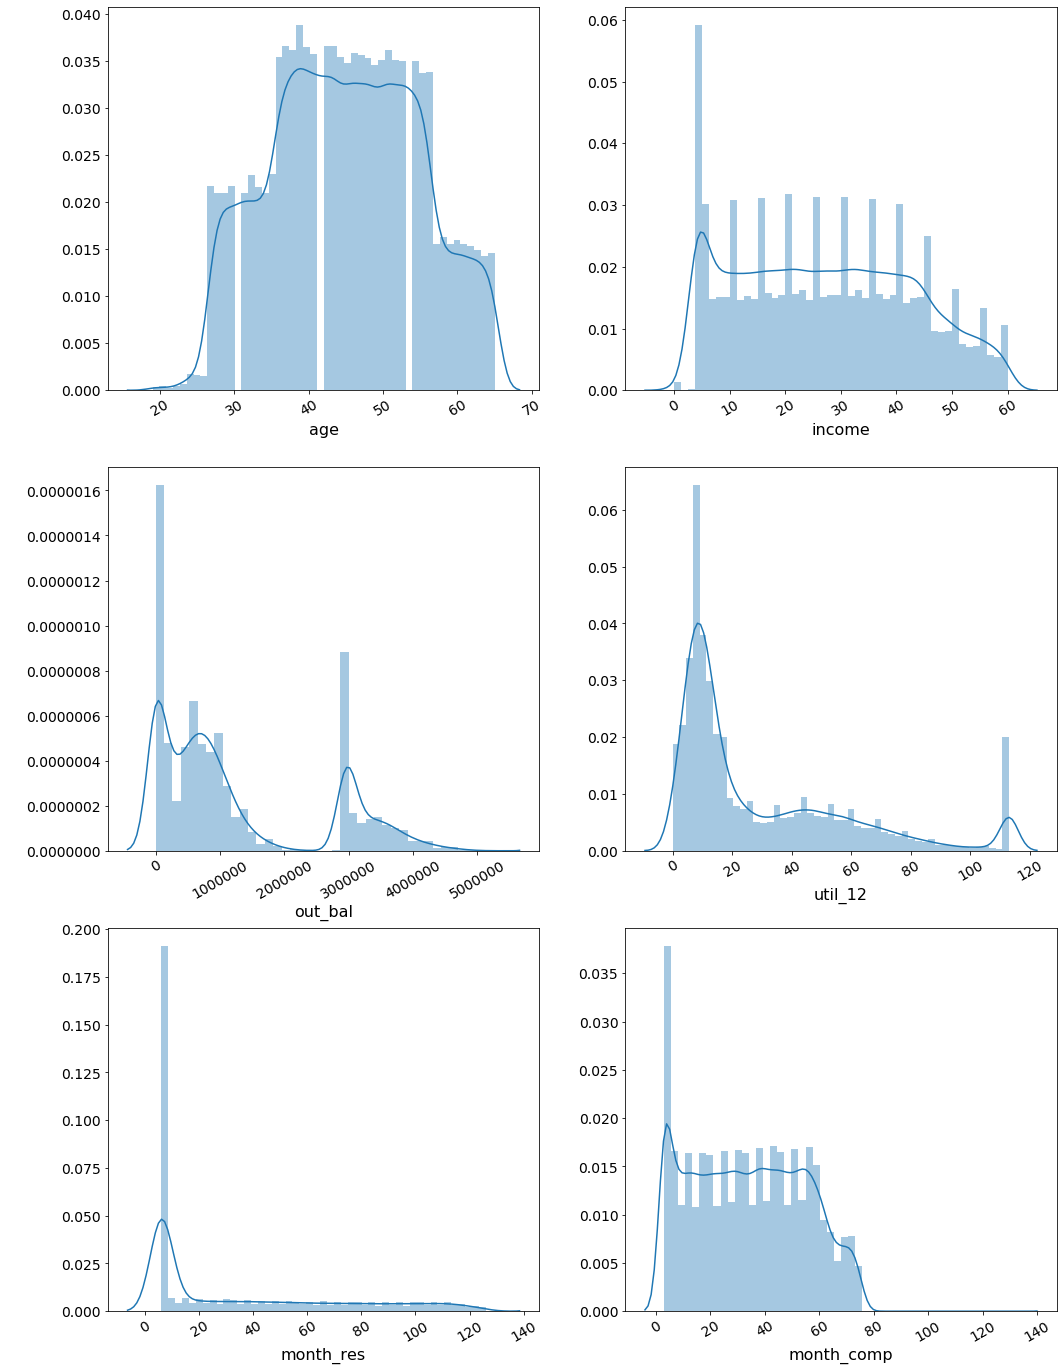

In [19]:
###visualising the distribution of each variable
obj=list(crdemo[['age','income','out_bal','util_12','month_res','month_comp']])
l=np.arange(len(obj))
fig=plt.figure(figsize=(17,4*len(l)))
for i,m in zip(obj,l):
        plt.subplot((len(l)+1)/2,2,(m+1))
        sns.distplot(crdemo[i], norm_hist=True)
        plt.xlabel(i, fontsize=16)
        plt.ylabel(' ', fontsize=16)
        plt.xticks(fontsize=14, rotation=30)
        plt.yticks(fontsize=14)
#plt.savefig("histograms")

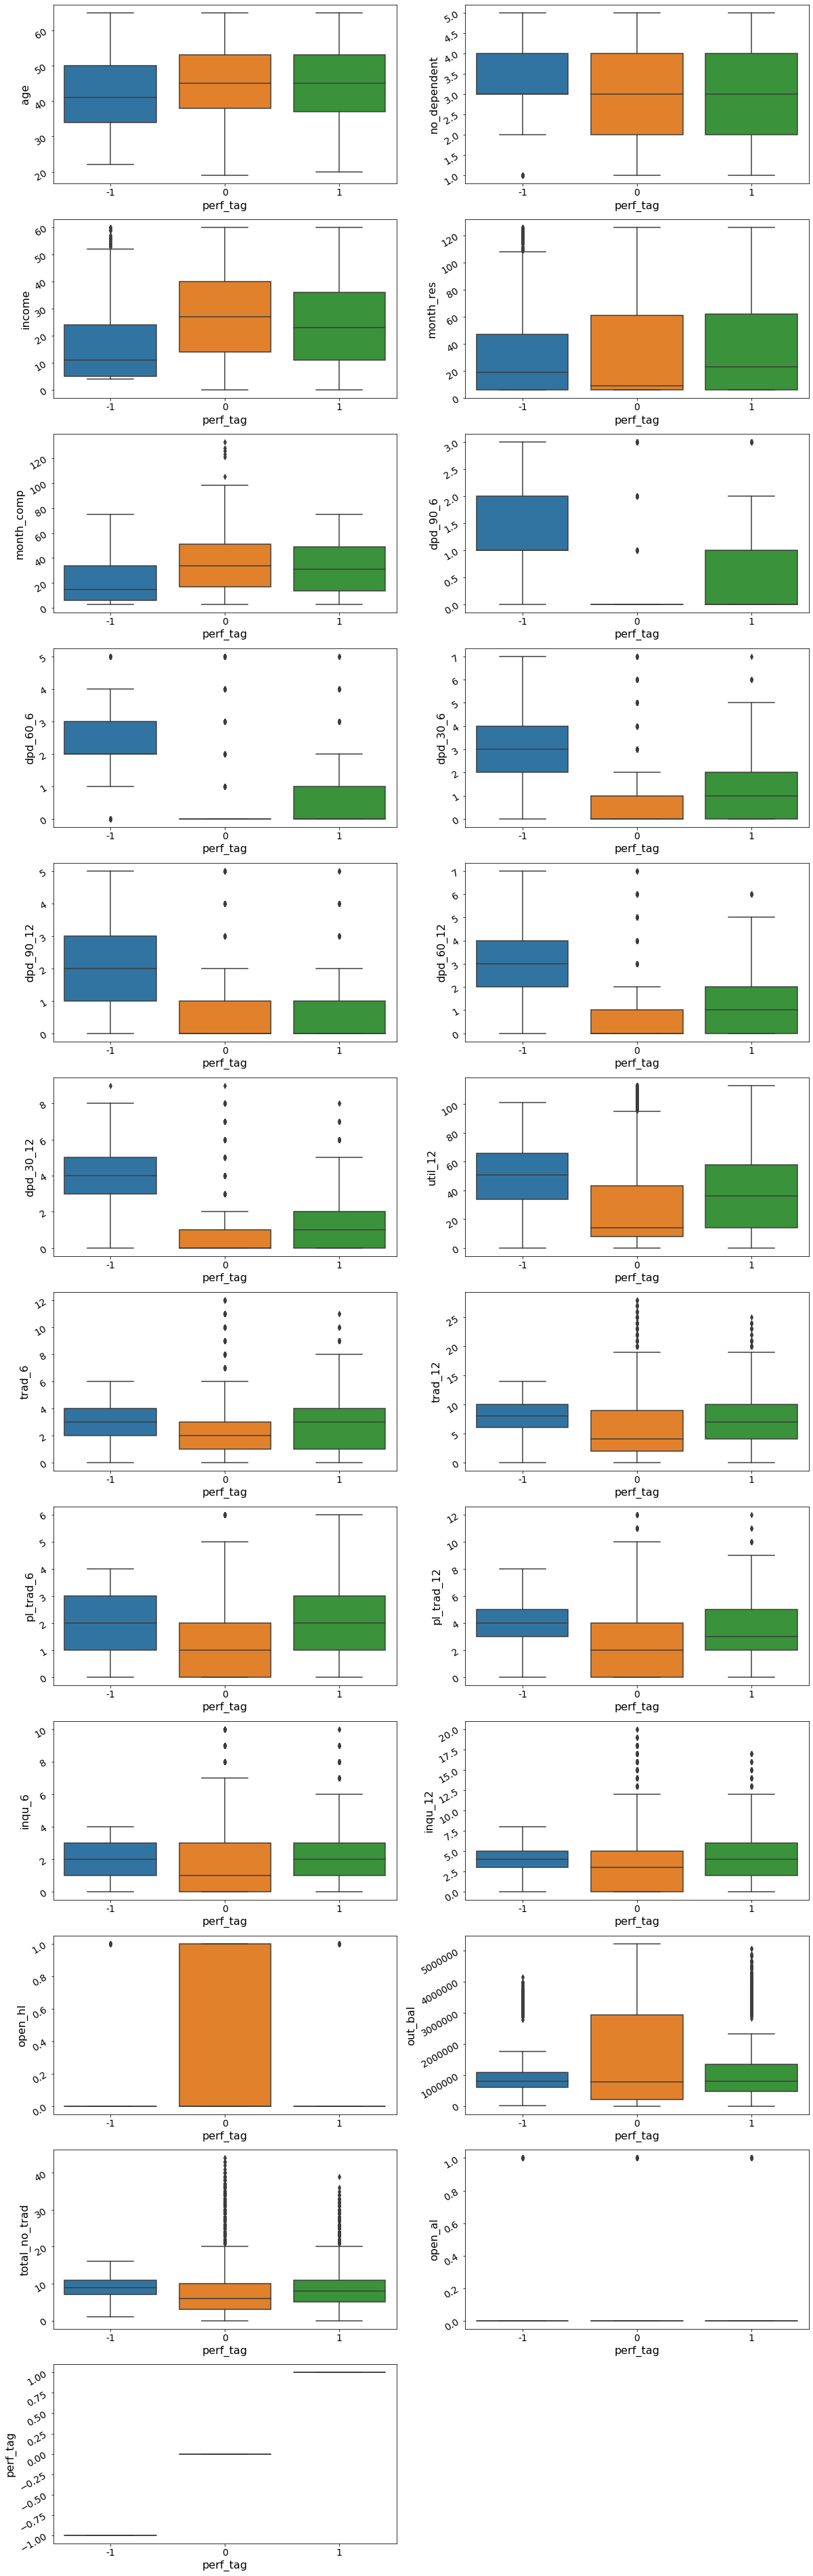

In [20]:
###visualising the distribution of each variable
obj=list(crdemo.select_dtypes(["float", 'int64']))
l=np.arange(len(obj))
fig=plt.figure(figsize=(20,3*len(l)))
for i,m in zip(obj,l):
        plt.subplot((len(l)+1)/2,2,(m+1))
        sns.boxplot(y=i,x='perf_tag', data=crdemo)
        plt.xlabel("perf_tag", fontsize=16)
        plt.ylabel(i, fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14, rotation=30)
#plt.savefig("int_float_boxplot")

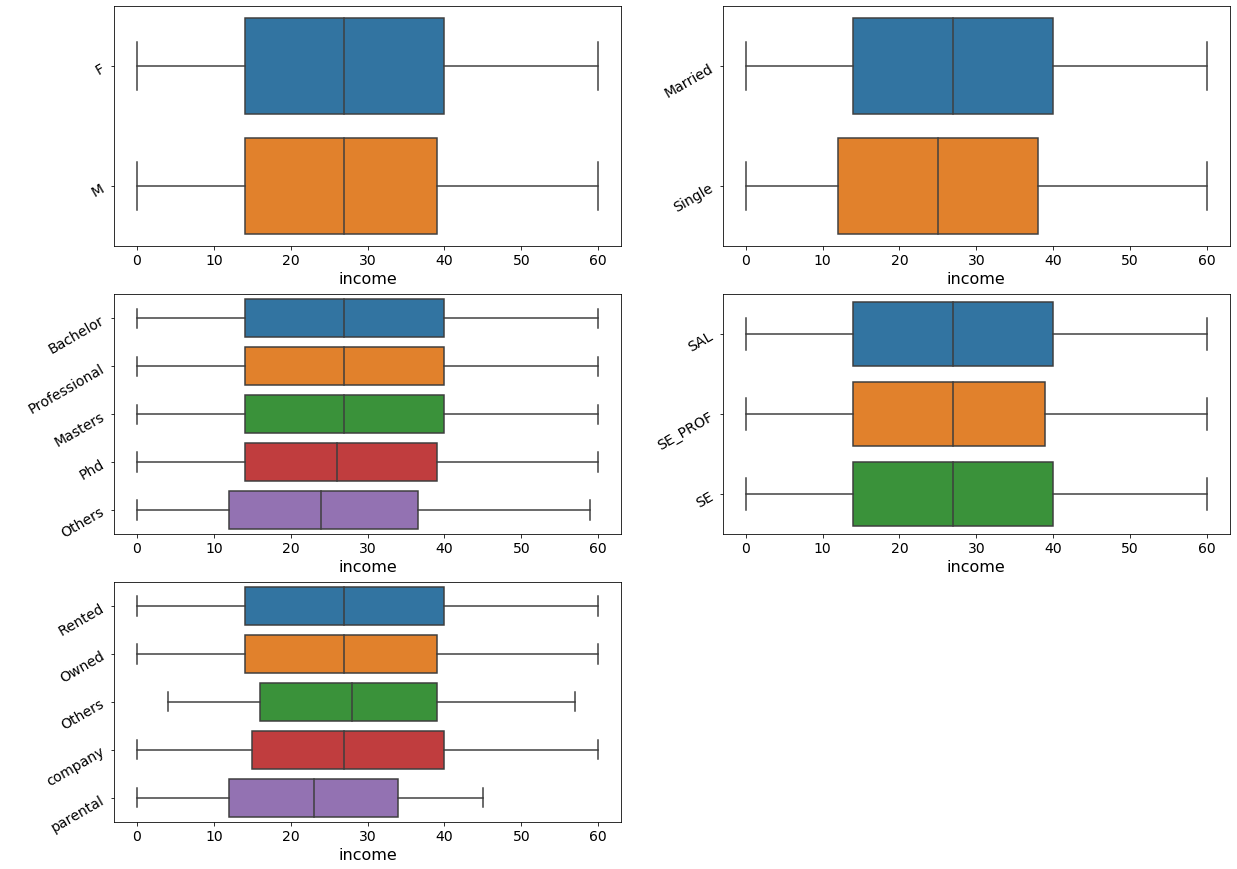

In [21]:
###visualising the distribution of each variable
obj=list(crdemo.select_dtypes(["object"]))
l=np.arange(len(obj))
fig=plt.figure(figsize=(20,3*len(l)))
for i,m in zip(obj,l):
        plt.subplot((len(l)+1)/2,2,(m+1))
        sns.boxplot(x='income',y=i,data=crdemo)
        plt.xlabel("income", fontsize=16)
        plt.ylabel(" ", fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14, rotation=30)
#plt.savefig("object_boxplot")

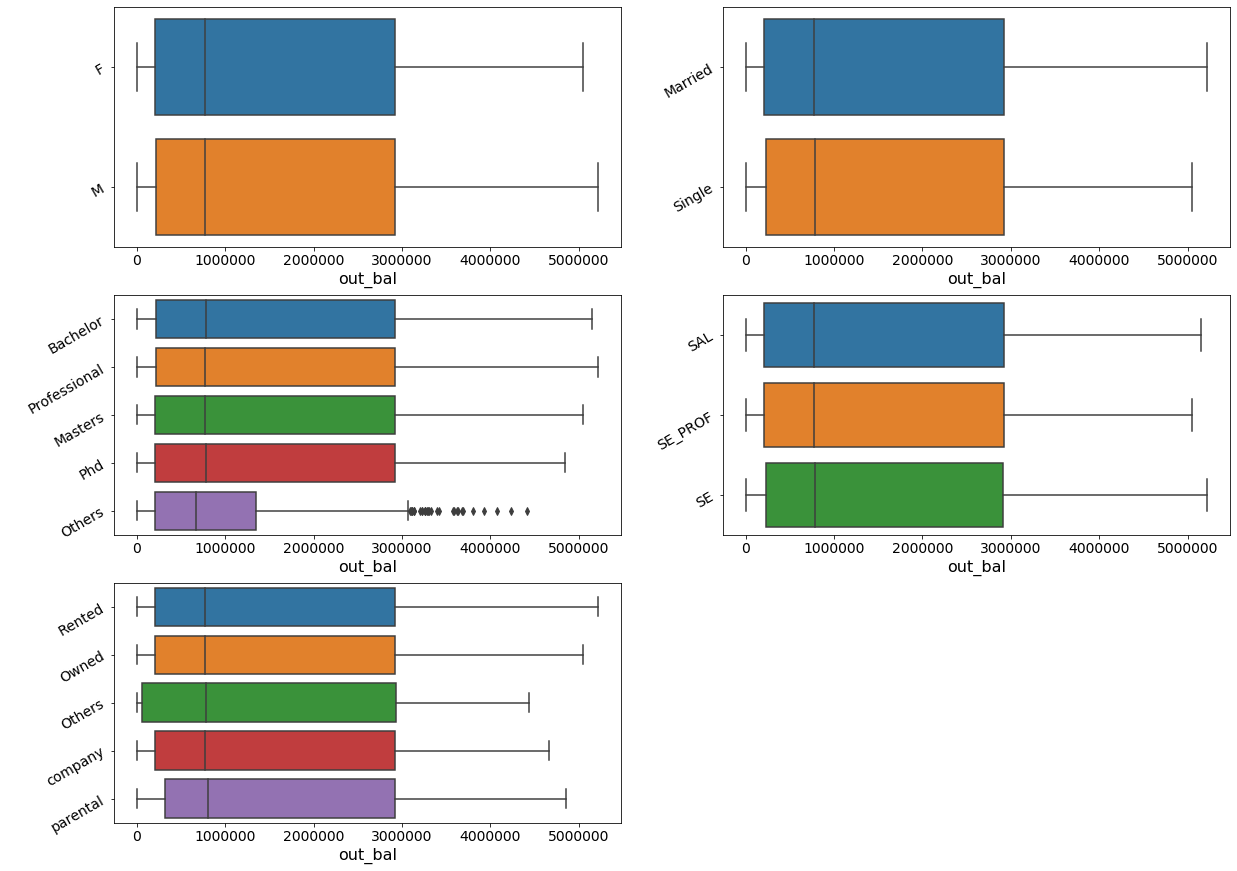

In [22]:
###visualising the distribution of each variable
obj=list(crdemo.select_dtypes(["object"]))
l=np.arange(len(obj))
fig=plt.figure(figsize=(20,3*len(l)))
for i,m in zip(obj,l):
        plt.subplot((len(l)+1)/2,2,(m+1))
        sns.boxplot(x='out_bal',y=i,data=crdemo)
        plt.xlabel("out_bal", fontsize=16)
        plt.ylabel(" ", fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14, rotation=30)
#plt.savefig("object_out_bal_boxplot")

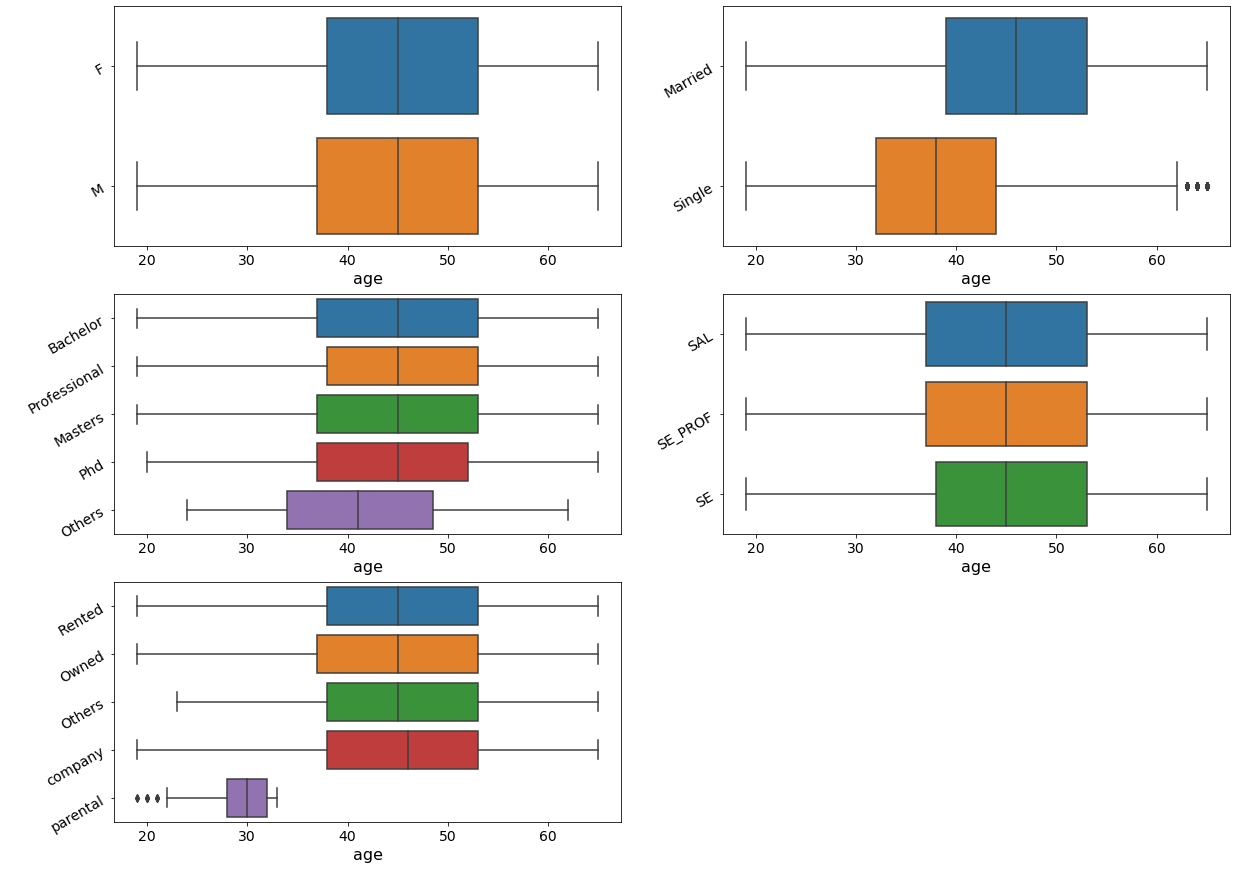

In [23]:
###visualising the distribution of each variable
obj=list(crdemo.select_dtypes(["object"]))
l=np.arange(len(obj))
fig=plt.figure(figsize=(20,3*len(l)))
for i,m in zip(obj,l):
        plt.subplot((len(l)+1)/2,2,(m+1))
        sns.boxplot(x='age',y=i,data=crdemo)
        plt.xlabel("age", fontsize=16)
        plt.ylabel(" ", fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14, rotation=30)
#plt.savefig("object_age_boxplot")

### Model Building using Demographic Data

In [18]:
### taking the Demographic data out to build model using this data only
clean_demo=crdemo[[ 'age', 'gender', 'marital_status', 'no_dependent', 'income',
       'education', 'profession', 'type_res', 'month_res', 'month_comp','perf_tag']]

In [19]:
######take the -1 category out of the dataset
clean_demo=clean_demo[clean_demo['perf_tag'] != -1]

In [20]:
##create a copy 
clean_demo1=clean_demo.copy()
clean_demo.head()

age gender marital_status  no_dependent  income     education profession  \
0   48      F        Married             2      40      Bachelor        SAL   
1   31      M        Married             4      55  Professional    SE_PROF   
2   32      M         Single             2      46      Bachelor    SE_PROF   
3   43      M        Married             1      53      Bachelor         SE   
4   35      F        Married             5      44  Professional        SAL   

  type_res  month_res  month_comp  perf_tag  
0   Rented        113          56         0  
1   Rented        112          46         0  
2   Rented        104          49         0  
3   Rented         94          53         0  
4   Rented        112          43         0

In [21]:
###define function to calculate WOE and IV
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [22]:
#Information Value  	Variable Predictiveness
#   Less than 0.02   	Not useful for prediction
#   0.02 to 0.1     	Weak predictive Power
#   0.1 to 0.3      	Medium predictive Power
#   0.3 to 0.5      	Strong predictive Power
#  >0.5             	Suspicious Predictive Power

In [23]:
##only three variable are important
## Income
## month_res
## month_comp
IV, WOE = iv_woe(clean_demo1, 'perf_tag', show_woe=False)
IV
## only "Income", "month_comp" and "month_res" have IV from 0.02 to 0.07
## means all three are weak predictors

Variable        IV
0             age  0.004119
0          gender  0.000333
0  marital_status  0.000098
0    no_dependent  0.002613
0          income  0.043041
0       education  0.000547
0      profession  0.002212
0        type_res  0.000965
0       month_res  0.071028
0      month_comp  0.022745

In [24]:
WOE

Variable          Cutoff      N  Events  % of Events  Non-Events  \
0             age  (18.999, 31.0]   7182     301     0.102172        6881   
1             age    (31.0, 36.0]   7864     342     0.116090        7522   
2             age    (36.0, 39.0]   7139     320     0.108622        6819   
3             age    (39.0, 42.0]   7000     309     0.104888        6691   
4             age    (42.0, 45.0]   6874     278     0.094365        6596   
5             age    (45.0, 48.0]   6866     299     0.101494        6567   
6             age    (48.0, 51.0]   6789     267     0.090631        6522   
7             age    (51.0, 54.0]   6783     248     0.084182        6535   
8             age    (54.0, 58.0]   6405     290     0.098439        6115   
9             age    (58.0, 65.0]   6848     292     0.099117        6556   
0          gender               F  16479     718     0.243720       15761   
1          gender               M  53271    2228     0.756280       51043   
0  marital_status         Married  59473    2502     0.849287       56971   
1  marital_status          Single  10277     444     0.150713        9833   
0    no_dependent               1  15188     667     0.226409       14521   
1    no_dependent               2  15091     588     0.199593       14503   
2    no_dependent               3  15612     694     0.235574       14918   
3    no_dependent               4  11991     494     0.167685       11497   
4    no_dependent               5  11868     503     0.170740       11365   
0          income   (-0.001, 6.0]   7636     451     0.153089        7185   
1          income     (6.0, 11.0]   6505     314     0.106585        6191   
2          income    (11.0, 17.0]   7965     363     0.123218        7602   
3          income    (17.0, 22.0]   6779     320     0.108622        6459   
4          income    (22.0, 27.0]   6784     283     0.096062        6501   
5          income    (27.0, 32.0]   6819     298     0.101154        6521   
6          income    (32.0, 37.0]   6836     251     0.085200        6585   
7          income    (37.0, 42.0]   6579     213     0.072301        6366   
8          income    (42.0, 49.0]   7387     265     0.089952        7122   
9          income    (49.0, 60.0]   6460     188     0.063815        6272   
0       education        Bachelor  17267     741     0.251527       16526   
1       education         Masters  23452     998     0.338764       22454   
2       education          Others    236      13     0.004413         223   
3       education             Phd   4452     183     0.062118        4269   
4       education    Professional  24343    1011     0.343177       23332   
0      profession             SAL  39613    1629     0.552953       37984   
1      profession              SE  13910     641     0.217583       13269   
2      profession         SE_PROF  16227     676     0.229464       15551   
0        type_res          Others    198       5     0.001697         193   
1        type_res           Owned  13978     592     0.200950       13386   
2        type_res          Rented  52216    2196     0.745418       50020   
3        type_res         company   1598      73     0.024779        1525   
4        type_res        parental   1760      80     0.027155        1680   
0       month_res   (5.999, 10.0]  35061    1160     0.393754       33901   
1       month_res    (10.0, 29.0]   6914     457     0.155126        6457   
2       month_res    (29.0, 50.0]   7151     403     0.136796        6748   
3       month_res    (50.0, 73.0]   6920     329     0.111677        6591   
4       month_res    (73.0, 98.0]   6900     328     0.111337        6572   
5       month_res   (98.0, 126.0]   6804     269     0.091310        6535   
0      month_comp    (2.999, 6.0]   7646     356     0.120842        7290   
1      month_comp     (6.0, 13.0]   6839     344     0.116768        6495   
2      month_comp    (13.0, 20.0]   6868     350     0.118805        6518   
3    

In [25]:
### replacing values of DataFrame with WOE values
### creating categories/bins from discrete values
clean_demo1['age'] = pd.qcut(clean_demo1['age'], 10,  duplicates='drop')
clean_demo1['income'] = pd.qcut(clean_demo1['income'], 10,  duplicates='drop')
clean_demo1['month_res'] = pd.qcut(clean_demo1['month_res'], 10,  duplicates='drop')
clean_demo1['month_comp'] = pd.qcut(clean_demo1['month_comp'], 10,  duplicates='drop')

IV, WOE = iv_woe(clean_demo1,'perf_tag', show_woe=False)
cols=clean_demo1.columns
for i in cols[~cols.isin(['perf_tag'])]:
    r = WOE[WOE['Variable']== i][['Cutoff','WoE']]
    r1=r[['Cutoff', 'WoE']]
    clean_demo1[i]=clean_demo1[i].replace(list(r1['Cutoff']), list(r1['WoE'])) 
clean_demo1.head()    

age    gender  marital_status  no_dependent    income  education  \
0  0.031946  0.032490       -0.004137     -0.084069 -0.276120   0.016625   
1 -0.008094 -0.010249       -0.004137     -0.025991 -0.386094  -0.017571   
2  0.030538 -0.010249        0.023640     -0.084069 -0.169899   0.016625   
3 -0.045283 -0.010249       -0.004137      0.040754 -0.386094   0.016625   
4  0.030538  0.032490       -0.004137      0.003611 -0.169899  -0.017571   

   profession  type_res  month_res  month_comp  perf_tag  
0   -0.027884 -0.004471  -0.068902   -0.227980         0  
1   -0.014373 -0.004471  -0.068902   -0.151444         0  
2   -0.014373 -0.004471  -0.068902   -0.253055         0  
3    0.091158 -0.004471   0.123755   -0.253055         0  
4   -0.027884 -0.004471  -0.068902   -0.151444         0

In [26]:
###taking X and Y components in different datasets
clean_demo_x=clean_demo1[[ 'age', 'gender', 'marital_status', 'no_dependent', 'income',
       'education', 'profession', 'type_res', 'month_res', 'month_comp']]
clean_demo_y=clean_demo1[['perf_tag']]

In [27]:
### train and test split
from sklearn.model_selection import train_test_split
x_train_demo, x_test_demo, y_train_demo, y_test_demo=train_test_split(clean_demo_x,clean_demo_y, test_size=0.3, random_state=25)
print(y_train_demo.info())
print(x_train_demo.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48825 entries, 71243 to 29907
Data columns (total 1 columns):
perf_tag    48825 non-null int64
dtypes: int64(1)
memory usage: 762.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48825 entries, 71243 to 29907
Data columns (total 10 columns):
age               48825 non-null float64
gender            48825 non-null float64
marital_status    48825 non-null float64
no_dependent      48825 non-null float64
income            48825 non-null float64
education         48825 non-null float64
profession        48825 non-null float64
type_res          48825 non-null float64
month_res         48825 non-null float64
month_comp        48825 non-null float64
dtypes: float64(10)
memory usage: 4.1 MB
None


In [28]:
### RFE and VIF for feature selection
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
logdemo=LogisticRegression(class_weight='balanced')
rfe=RFE(logdemo, 10)
rfe.fit(x_train_demo, y_train_demo)
col_demo=x_train_demo.columns[rfe.support_]

vif=pd.DataFrame()
vif['features'] = x_train_demo[col_demo].columns
vif['VIF']= [variance_inflation_factor(x_train_demo[col_demo].values, i) for i in range( x_train_demo[col_demo].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

features   VIF
4          income  1.03
8       month_res  1.02
0             age  1.01
2  marital_status  1.01
9      month_comp  1.01
1          gender  1.00
3    no_dependent  1.00
5       education  1.00
6      profession  1.00
7        type_res  1.00

In [29]:
### As per the WOE confirmed only three attributes are weak predictor
## Rest of the attributes are useless for prediction
col_demo=[ 'income', 'month_res', 'month_comp']
x_train_demo_sm=sm.add_constant(x_train_demo[col_demo])
log_sm=sm.GLM(y_train_demo, x_train_demo_sm, family=sm.families.Binomial())
sm_result=log_sm.fit()
print(sm_result.summary())
printmd("**The Important variables/Features are Income, month_res and month_comp**")

                 Generalized Linear Model Regression Results                  
Dep. Variable:               perf_tag   No. Observations:                48825
Model:                            GLM   Df Residuals:                    48821
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8457.4
Date:                Sun, 15 Sep 2019   Deviance:                       16915.
Time:                        02:24:20   Pearson chi2:                 4.90e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1152      0.023   -136.782      0.000      -3.160      -3.071
income         0.8972      0.110      8.165      0.0

**The Important variables/Features are Income, month_res and month_comp**

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logdemo=LogisticRegression(class_weight='balanced')

logdemo.fit(x_train_demo[col_demo], y_train_demo)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Hyperparameter Tuning

In [31]:
### GridSearch to select the best parameters
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

x_train_cv = x_train_demo[col_demo]
y_train_cv = y_train_demo

folds = KFold(n_splits = 10, shuffle = True, random_state = 44)
hyper_params = [ {'tol': [1e-1,1e-2,1e-4,1e-6,1e-8],'C': [1,10,100, 1000]}]
model_linear = LogisticRegression(class_weight='balanced', n_jobs=-1,)

model_cv = GridSearchCV(estimator = model_linear, param_grid = hyper_params,scoring= 'recall',  cv = folds,  verbose = 1,
                        return_train_score=True, n_jobs=-1)
model_cv.fit(x_train_cv, y_train_cv) 

print("best hyperparameters", (model_cv.best_params_))
print("best score", model_cv.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.7s


best hyperparameters {'C': 10, 'tol': 0.1}
best score 0.5502477399439595


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.1s finished


In [32]:
logdemo=LogisticRegression(class_weight='balanced', C=10, tol= 0.1)

logdemo.fit(x_train_demo[col_demo], y_train_demo)

LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.1, verbose=0,
                   warm_start=False)

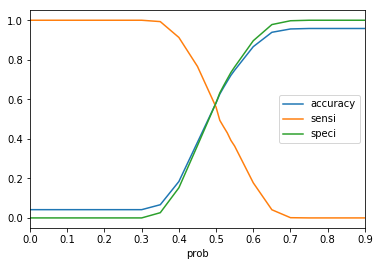

      prob  accuracy     sensi     speci
0.00  0.00  0.041720  1.000000  0.000000
0.10  0.10  0.041720  1.000000  0.000000
0.20  0.20  0.041720  1.000000  0.000000
0.25  0.25  0.041720  1.000000  0.000000
0.30  0.30  0.041720  1.000000  0.000000
0.35  0.35  0.066714  0.993127  0.026381
0.40  0.40  0.184134  0.912944  0.152404
0.45  0.45  0.382796  0.766323  0.366098
0.50  0.50  0.582079  0.560137  0.583034
0.51  0.51  0.626428  0.493700  0.632206
0.52  0.52  0.659403  0.461627  0.668013
0.53  0.53  0.690896  0.430699  0.702224
0.54  0.54  0.721768  0.391753  0.736136
0.55  0.55  0.747431  0.363116  0.764163
0.60  0.60  0.866380  0.177549  0.896369
0.65  0.65  0.939020  0.041237  0.978107
0.70  0.70  0.955890  0.001145  0.997457
0.75  0.75  0.958280  0.000000  1.000000
0.80  0.80  0.958280  0.000000  1.000000
0.85  0.85  0.958280  0.000000  1.000000
0.90  0.90  0.958280  0.000000  1.000000
  
Confusion Matrix 
[[11691  8361]
 [  384   489]]
  
Accuracy Score 
0.582078853046595
  
 Class

In [33]:
x_test=x_test_demo[col_demo]
y_test=y_test_demo

y_pred=pd.DataFrame(logdemo.predict_proba(x_test))[[1]]
y_pred.rename(columns={1:'predicted'}, inplace=True)

numbers = [0.0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in numbers:
    y_pred[i]= y_pred.predicted.map(lambda x: 1 if x > i else 0)

cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in num:
    cm = confusion_matrix(y_test,y_pred[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]

cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()
print(cutoff)
print('  ')
print('Confusion Matrix ')
y_pred_final=y_pred[['predicted']]
y_pred_final['predicted']=y_pred_final.predicted.map(lambda x: 1 if x > 0.5 else 0)
print(confusion_matrix(y_test, y_pred_final))
print('  ')
print('Accuracy Score ')
print(accuracy_score(y_test, y_pred_final))
print('  ')
print(' Classification Report ')
print(classification_report(y_test, y_pred_final))

## Model Building Using both datasets (credit bureau and demographic) by WOE

In [34]:
crdemo_woe=crdemo.copy()
crdemo_woe.head()

age gender marital_status  no_dependent  income     education profession  \
0   48      F        Married             2      40      Bachelor        SAL   
1   31      M        Married             4      55  Professional    SE_PROF   
2   32      M         Single             2      46      Bachelor    SE_PROF   
3   43      M        Married             1      53      Bachelor         SE   
4   35      F        Married             5      44  Professional        SAL   

  type_res  month_res  month_comp  ...  trad_12  pl_trad_6  pl_trad_12  \
0   Rented        113          56  ...        2          0           0   
1   Rented        112          46  ...        2          0           0   
2   Rented        104          49  ...        0          0           0   
3   Rented         94          53  ...        1          0           0   
4   Rented        112          43  ...        1          0           0   

   inqu_6  inqu_12  open_hl    out_bal  total_no_trad  open_al  perf_tag  
0       0        0        1  2999395.0              4        0         0  
1       0        0        0     3078.0              5        0         0  
2       0        0        1  3004972.0              2        0         0  
3       0        0        1  3355373.0              4        1         0  
4       0        0        1  3014283.0              4        0         0  

[5 rows x 28 columns]

In [35]:
###replacing values of DataFrame with WOE values
### MAking the bins (deciles) for the numerical parameters in datasets using qcut 
crdemo_woe=crdemo.copy()
crdemo_woe['age'] = pd.qcut(crdemo_woe['age'], 10,  duplicates='drop')
crdemo_woe['income'] = pd.qcut(crdemo_woe['income'], 10,  duplicates='drop')
crdemo_woe['month_res'] = pd.qcut(crdemo_woe['month_res'], 10,  duplicates='drop')
crdemo_woe['month_comp'] = pd.qcut(crdemo_woe['month_comp'], 10,  duplicates='drop')
crdemo_woe['trad_12'] = pd.qcut(crdemo_woe['trad_12'], 10,  duplicates='drop')
crdemo_woe['total_no_trad'] = pd.qcut(crdemo_woe['total_no_trad'], 10,  duplicates='drop')
crdemo_woe['util_12'] = pd.qcut(crdemo_woe['util_12'], 10,  duplicates='drop')
crdemo_woe['trad_6'] = pd.qcut(crdemo_woe['trad_6'], 10,  duplicates='drop')
crdemo_woe['pl_trad_12'] = pd.qcut(crdemo_woe['pl_trad_12'], 10,  duplicates='drop')
crdemo_woe['inqu_6'] = pd.qcut(crdemo_woe['inqu_6'], 10,  duplicates='drop')
crdemo_woe['inqu_12'] = pd.qcut(crdemo_woe['inqu_12'], 10,  duplicates='drop')

In [36]:
crdemo_woe.head()

age gender marital_status  no_dependent        income  \
0    (45.0, 48.0]      F        Married             2  (37.0, 42.0]   
1  (18.999, 31.0]      M        Married             4  (49.0, 60.0]   
2    (31.0, 36.0]      M         Single             2  (42.0, 49.0]   
3    (42.0, 45.0]      M        Married             1  (49.0, 60.0]   
4    (31.0, 36.0]      F        Married             5  (42.0, 49.0]   

      education profession type_res      month_res    month_comp  ...  \
0      Bachelor        SAL   Rented  (98.0, 126.0]  (54.0, 62.0]  ...   
1  Professional    SE_PROF   Rented  (98.0, 126.0]  (40.0, 47.0]  ...   
2      Bachelor    SE_PROF   Rented  (98.0, 126.0]  (47.0, 54.0]  ...   
3      Bachelor         SE   Rented   (72.0, 98.0]  (47.0, 54.0]  ...   
4  Professional        SAL   Rented  (98.0, 126.0]  (40.0, 47.0]  ...   

         trad_12  pl_trad_6     pl_trad_12         inqu_6        inqu_12  \
0     (1.0, 2.0]          0  (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 1.0]   
1     (1.0, 2.0]          0  (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 1.0]   
2  (-0.001, 1.0]          0  (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 1.0]   
3  (-0.001, 1.0]          0  (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 1.0]   
4  (-0.001, 1.0]          0  (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 1.0]   

   open_hl    out_bal  total_no_trad open_al  perf_tag  
0        1  2999395.0     (3.0, 4.0]       0         0  
1        0     3078.0     (4.0, 5.0]       0         0  
2        1  3004972.0  (-0.001, 2.0]       0         0  
3        1  3355373.0     (3.0, 4.0]       1         0  
4        1  3014283.0     (3.0, 4.0]       0         0  

[5 rows x 28 columns]

In [37]:
### taking the datasets of rjected applicants out
crdemo_woe_rejected=crdemo_woe[crdemo_woe['perf_tag'] == -1]
crdemo_woe_rejected.head()

age gender marital_status  no_dependent         income  \
69600  (31.0, 36.0]      M         Single             1  (-0.001, 6.0]   
69601  (45.0, 48.0]      F        Married             4   (11.0, 16.0]   
69602  (45.0, 48.0]      M        Married             3    (6.0, 11.0]   
69603  (39.0, 42.0]      M        Married             3   (16.0, 21.0]   
69604  (39.0, 42.0]      F        Married             4   (16.0, 21.0]   

          education profession type_res      month_res    month_comp  ...  \
69600      Bachelor        SAL   Rented   (11.0, 29.0]  (13.0, 20.0]  ...   
69601       Masters         SE   Rented  (98.0, 126.0]  (20.0, 27.0]  ...   
69602  Professional         SE   Rented  (5.999, 11.0]  (27.0, 34.0]  ...   
69603       Masters        SAL   Rented  (5.999, 11.0]  (40.0, 47.0]  ...   
69604           Phd        SAL   Rented  (5.999, 11.0]  (47.0, 54.0]  ...   

            trad_12  pl_trad_6   pl_trad_12         inqu_6     inqu_12  \
69600  (10.0, 13.0]          3  (6.0, 12.0]     (1.0, 2.0]  (3.0, 4.0]   
69601    (6.0, 8.0]          3   (3.0, 4.0]     (2.0, 3.0]  (4.0, 5.0]   
69602    (6.0, 8.0]          2   (3.0, 4.0]  (-0.001, 1.0]  (2.0, 3.0]   
69603    (6.0, 8.0]          1   (3.0, 4.0]     (3.0, 5.0]  (4.0, 5.0]   
69604    (6.0, 8.0]          2   (2.0, 3.0]     (2.0, 3.0]  (5.0, 6.0]   

       open_hl    out_bal total_no_trad open_al  perf_tag  
69600        0  1309623.0  (11.0, 20.0]       0        -1  
69601        0   775626.0    (6.0, 8.0]       0        -1  
69602        0   732602.0    (6.0, 8.0]       0        -1  
69603        0   842057.0    (6.0, 8.0]       0        -1  
69604        0   786997.0    (6.0, 8.0]       1        -1  

[5 rows x 28 columns]

In [38]:
###applicants who have credit card
crdemo_woe=crdemo_woe[crdemo_woe['perf_tag'] != -1]

In [39]:
#Information Value  	Variable Predictiveness
#   Less than 0.02   	Not useful for prediction
#   0.02 to 0.1     	Weak predictive Power
#   0.1 to 0.3      	Medium predictive Power
#   0.3 to 0.5      	Strong predictive Power
#  >0.5             	Suspicious Predictive Power

In [40]:
###WOE and IV for the data set
IV1, WOE1 = iv_woe(crdemo_woe, 'perf_tag', show_woe=False)
IV1

## Weak Predictors - Income, month_res, month_comp, 

## Moderate Predictor - dpd_90_6, dpd_60_6, dpd_30_6, dpd_90_12, dpd_60_12, dpd_30_12, trad_6, trad_12, pl_trad_6
#                       pl_trad_12, inqu_6, inqu_12, out_bal, total_no_trad

## Strong Predictors - util_12, 

Variable        IV
0             age  0.004119
0          gender  0.000333
0  marital_status  0.000098
0    no_dependent  0.002613
0          income  0.042456
0       education  0.000547
0      profession  0.002212
0        type_res  0.000965
0       month_res  0.066717
0      month_comp  0.022604
0        dpd_90_6  0.162629
0        dpd_60_6  0.211256
0        dpd_30_6  0.244245
0       dpd_90_12  0.215586
0       dpd_60_12  0.188371
0       dpd_30_12  0.218713
0         util_12  0.302582
0          trad_6  0.187088
0         trad_12  0.294208
0       pl_trad_6  0.224010
0      pl_trad_12  0.258425
0          inqu_6  0.113250
0         inqu_12  0.244926
0         open_hl  0.017024
0         out_bal  0.243525
0   total_no_trad  0.231680
0         open_al  0.001632

In [41]:
WOE1

Variable                  Cutoff      N  Events  % of Events  \
0              age          (18.999, 31.0]   7182     301     0.102172   
1              age            (31.0, 36.0]   7864     342     0.116090   
2              age            (36.0, 39.0]   7139     320     0.108622   
3              age            (39.0, 42.0]   7000     309     0.104888   
4              age            (42.0, 45.0]   6874     278     0.094365   
5              age            (45.0, 48.0]   6866     299     0.101494   
6              age            (48.0, 51.0]   6789     267     0.090631   
7              age            (51.0, 54.0]   6783     248     0.084182   
8              age            (54.0, 58.0]   6405     290     0.098439   
9              age            (58.0, 65.0]   6848     292     0.099117   
0           gender                       F  16479     718     0.243720   
1           gender                       M  53271    2228     0.756280   
0   marital_status                 Married  59473    2502     0.849287   
1   marital_status                  Single  10277     444     0.150713   
0     no_dependent                       1  15188     667     0.226409   
1     no_dependent                       2  15091     588     0.199593   
2     no_dependent                       3  15612     694     0.235574   
3     no_dependent                       4  11991     494     0.167685   
4     no_dependent                       5  11868     503     0.170740   
0           income           (-0.001, 6.0]   7636     451     0.153089   
1           income             (6.0, 11.0]   6505     314     0.106585   
2           income            (11.0, 16.0]   6592     304     0.103191   
3           income            (16.0, 21.0]   6790     310     0.105227   
4           income            (21.0, 27.0]   8146     352     0.119484   
5           income            (27.0, 32.0]   6819     298     0.101154   
6           income            (32.0, 37.0]   6836     251     0.085200   
7           income            (37.0, 42.0]   6579     213     0.072301   
8           income            (42.0, 49.0]   7387     265     0.089952   
9           income            (49.0, 60.0]   6460     188     0.063815   
0        education                Bachelor  17267     741     0.251527   
..             ...                     ...    ...     ...          ...   
2          inqu_12              (2.0, 3.0]   8967     443     0.150373   
3          inqu_12              (3.0, 4.0]   7109     380     0.128988   
4          inqu_12              (4.0, 5.0]   4925     362     0.122878   
5          inqu_12              (5.0, 6.0]   3610     247     0.083842   
6          inqu_12              (6.0, 9.0]   7106     421     0.142906   
7          inqu_12             (9.0, 20.0]   5732     250     0.084861   
0          open_hl                       0  51723    2340     0.794297   
1          open_hl                       1  18027     606     0.205703   
0          out_bal        (-0.001, 6535.0]   6976     143     0.048540   
1          out_bal       (6535.0, 23445.4]   6974     121     0.041073   
2          out_bal     (23445.4, 383474.0]   6975     251     0.085200   
3          out_bal    (383474.0, 583620.4]   6975     380     0.128988   
4          out_bal    (583620.4, 772702.0]   6975     445     0.151052   
5          out_bal    (772702.0, 970718.0]   6975     449     0.152410   
6          out_bal   (970718.0, 1355189.8]   6975     427     0.144942   
7          out_bal  (1355189.8, 2960502.8]   6975     210     0.071283   
8          out_bal  (2960502.8, 3279517.9]   6975     129     0.043788   
9          out_bal  (3279517.9, 5218801.0]   6975     391     0.132722   
0    total_no_trad           (-0.001, 2.0]  10643     191     0.064834   
1    total_no_trad              (2.0, 3.0]   8594     184     0.062458   
2    total_no_trad              (3.0, 4.0]   7471     205     0.069586   
3    total_no_trad              (4.0, 5.0]   5705     230     0.078072   
4    total_no_

In [42]:
##replacing data with WOE values
IV1, WOE1 = iv_woe(crdemo_woe,'perf_tag', show_woe=False)
cols=crdemo_woe.columns
for i in cols[~cols.isin(['perf_tag'])]:
    r = WOE1[WOE1['Variable']== i][['Cutoff','WoE']]
    r1=r[['Cutoff', 'WoE']]
    crdemo_woe[i]=crdemo_woe[i].replace(list(r1['Cutoff']), list(r1['WoE']))
    
len(crdemo_woe)

69750

In [43]:
crdemo_woe.head()

age    gender  marital_status  no_dependent    income  education  \
0  0.031946  0.032490       -0.004137     -0.084069 -0.276120   0.016625   
1 -0.008094 -0.010249       -0.004137     -0.025991 -0.386094  -0.017571   
2  0.030538 -0.010249        0.023640     -0.084069 -0.169899   0.016625   
3 -0.045283 -0.010249       -0.004137      0.040754 -0.386094   0.016625   
4  0.030538  0.032490       -0.004137      0.003611 -0.169899  -0.017571   

   profession  type_res  month_res  month_comp  ...   trad_12  pl_trad_6  \
0   -0.027884 -0.004471  -0.068902   -0.227980  ... -0.815675  -0.649303   
1   -0.014373 -0.004471  -0.068902   -0.178133  ... -0.815675  -0.649303   
2   -0.014373 -0.004471  -0.068902   -0.205447  ... -0.895068  -0.649303   
3    0.091158 -0.004471   0.128064   -0.205447  ... -0.895068  -0.649303   
4   -0.027884 -0.004471  -0.068902   -0.178133  ... -0.895068  -0.649303   

   pl_trad_12    inqu_6   inqu_12   open_hl    out_bal  total_no_trad  \
0   -0.686738 -0.319921 -0.828593 -0.237237  2999395.0      -0.446637   
1   -0.686738 -0.319921 -0.828593  0.071859     3078.0      -0.048554   
2   -0.686738 -0.319921 -0.828593 -0.237237  3004972.0      -0.880961   
3   -0.686738 -0.319921 -0.828593 -0.237237  3355373.0      -0.446637   
4   -0.686738 -0.319921 -0.828593 -0.237237  3014283.0      -0.446637   

    open_al  perf_tag  
0  0.011890         0  
1  0.011890         0  
2  0.011890         0  
3 -0.137309         0  
4  0.011890         0  

[5 rows x 28 columns]

In [44]:
## replacing data values with WOE in the rejected dataset
cols=crdemo_woe_rejected.columns
for i in cols[~cols.isin(['perf_tag'])]:
    r = WOE1[WOE1['Variable']== i][['Cutoff','WoE']]
    r1=r[['Cutoff', 'WoE']]
    crdemo_woe_rejected[i]=crdemo_woe_rejected[i].replace(list(r1['Cutoff']), list(r1['WoE']))
    
print(len(crdemo_woe_rejected))
print(crdemo_woe_rejected.columns)

1424
Index(['age', 'gender', 'marital_status', 'no_dependent', 'income',
       'education', 'profession', 'type_res', 'month_res', 'month_comp',
       'dpd_90_6', 'dpd_60_6', 'dpd_30_6', 'dpd_90_12', 'dpd_60_12',
       'dpd_30_12', 'util_12', 'trad_6', 'trad_12', 'pl_trad_6', 'pl_trad_12',
       'inqu_6', 'inqu_12', 'open_hl', 'out_bal', 'total_no_trad', 'open_al',
       'perf_tag'],
      dtype='object')


In [45]:
crdemo_woe_rejected.head()

age    gender  marital_status  no_dependent    income  education  \
69600  0.030538 -0.010249        0.023640      0.040754  0.353031   0.016625   
69601  0.031946  0.032490       -0.004137     -0.025991  0.091944   0.007844   
69602  0.031946 -0.010249       -0.004137      0.053463  0.139856  -0.017571   
69603  0.046137 -0.010249       -0.004137      0.053463  0.081411   0.007844   
69604  0.046137  0.032490       -0.004137     -0.025991  0.081411  -0.028334   

       profession  type_res  month_res  month_comp  ...   trad_12  pl_trad_6  \
69600   -0.027884 -0.004471   0.471379    0.196925  ...  0.403670   0.423429   
69601    0.091158 -0.004471  -0.068902    0.000122  ...  0.575475   0.423429   
69602    0.091158 -0.004471  -0.242019   -0.068066  ...  0.575475   0.438061   
69603   -0.027884 -0.004471  -0.242019   -0.178133  ...  0.575475   0.198667   
69604   -0.027884 -0.004471  -0.242019   -0.205447  ...  0.575475   0.438061   

       pl_trad_12    inqu_6   inqu_12   open_hl    out_bal  total_no_trad  \
69600    0.099798  0.215524  0.247304  0.071859  1309623.0       0.376016   
69601    0.500582  0.555027  0.587223  0.071859   775626.0       0.378766   
69602    0.500582 -0.319921  0.164243  0.071859   732602.0       0.378766   
69603    0.500582  0.328204  0.587223  0.071859   842057.0       0.378766   
69604    0.411425  0.555027  0.510114  0.071859   786997.0       0.378766   

        open_al  perf_tag  
69600  0.011890        -1  
69601  0.011890        -1  
69602  0.011890        -1  
69603  0.011890        -1  
69604 -0.137309        -1  

[5 rows x 28 columns]

In [46]:
woe_x=crdemo_woe[crdemo_woe.columns[~crdemo_woe.columns.isin(['perf_tag'])]]
woe_y=crdemo_woe['perf_tag']

In [47]:
from sklearn.model_selection import train_test_split
x_train_woe, x_test_woe, y_train_woe, y_test_woe=train_test_split(woe_x,woe_y, test_size=0.25, random_state=25)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_train=x_train_woe
y_train=y_train_woe

logwoe=LogisticRegression(class_weight='balanced')
rfe=RFE(logwoe, 13)
rfe.fit(x_train, y_train)
col_woe=x_train.columns[rfe.support_]

vif=pd.DataFrame()
vif['features'] = x_train[col_woe].columns
vif['VIF']= [variance_inflation_factor(x_train[col_woe].values, i) for i in range( x_train[col_woe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

features   VIF
10         trad_12  3.17
9          util_12  2.50
11         inqu_12  2.40
8         dpd_30_6  1.80
4           income  1.10
7       month_comp  1.05
0              age  1.01
2   marital_status  1.01
12         open_al  1.01
1           gender  1.00
3     no_dependent  1.00
5       profession  1.00
6         type_res  1.00

In [49]:
col_woe

Index(['age', 'gender', 'marital_status', 'no_dependent', 'income',
       'profession', 'type_res', 'month_comp', 'dpd_30_6', 'util_12',
       'trad_12', 'inqu_12', 'open_al'],
      dtype='object')

In [50]:
import statsmodels.api as sm
col_woe =['no_dependent', 'income', 'month_comp', 'dpd_30_6', 'util_12','trad_12', 'inqu_12']
x_train_sm=sm.add_constant(x_train[col_woe])
log_sm=sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
sm_result=log_sm.fit()
sm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               perf_tag   No. Observations:                52312
Model:                            GLM   Df Residuals:                    52304
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8784.3
Date:                Sun, 15 Sep 2019   Deviance:                       17569.
Time:                        02:25:00   Pearson chi2:                 5.19e+04
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.1172      0.023   -136.666      0.000      -3.162      -3.073
no_dependent     0.8985      0.428      2.099      0.036       0.060       1.737
income           0.2542      0.111      2.292      0.022       0.037       0.472
month_comp       0.4317      0.150      2.881      0.004       0.138       0.725
dpd_30_6         0.3931      0.055      7.191      0.000       0.286       0.500
util_12          0.3915      0.060      6.508      0.000       0.274       0.509
trad_12          0.2743      0.068      4.031      0.000       0.141       0.408
inqu_12          0.3033      0.066      4.573      0.000       0.173       0.433
================================================================================
"""

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logwoe=LogisticRegression(class_weight='balanced')
logwoe.fit(x_train[col_woe], y_train)

accuracy_score(y_test_woe, logwoe.predict(x_test_woe[col_woe]))

0.6079825668081202

In [52]:
###hyperparameter tuning
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

x_train_cv = x_train_woe[col_woe]
y_train_cv = y_train_woe

folds = KFold(n_splits = 10, shuffle = True, random_state = 44)
hyper_params = [ {'tol': [1e-1,1e-2,1e-4,1e-6,1e-8],'C': [1,10,100, 1000]}]
model_linear = LogisticRegression(class_weight='balanced', n_jobs=-1,)

model_cv = GridSearchCV(estimator = model_linear, param_grid = hyper_params,scoring= 'recall',  cv = folds,  verbose = 1,
                        return_train_score=True, n_jobs=-1)
model_cv.fit(x_train_cv, y_train_cv) 

print("best hyperparameters", (model_cv.best_params_))
print("best score", model_cv.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.5s


best hyperparameters {'C': 1, 'tol': 0.1}
best score 0.6653005447480278


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.5s finished


In [53]:
logwoe=LogisticRegression(class_weight='balanced', C=1, tol = 0.1)
logwoe.fit(x_train[col_woe], y_train)

accuracy_score(y_test_woe, logwoe.predict(x_test_woe[col_woe]))

0.6055166876935428

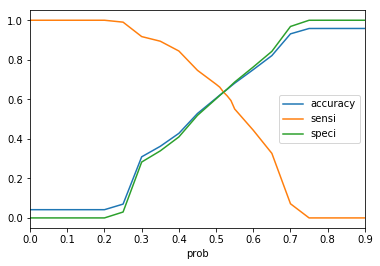

      prob  accuracy     sensi     speci
0.00  0.00  0.041633  1.000000  0.000000
0.10  0.10  0.041633  1.000000  0.000000
0.20  0.20  0.041633  1.000000  0.000000
0.25  0.25  0.069847  0.990358  0.029859
0.30  0.30  0.309095  0.917355  0.282671
0.35  0.35  0.362255  0.893939  0.339157
0.40  0.40  0.427801  0.844353  0.409706
0.45  0.45  0.528272  0.746556  0.518789
0.50  0.50  0.605517  0.676309  0.602441
0.51  0.51  0.621172  0.661157  0.619435
0.52  0.52  0.636025  0.636364  0.636010
0.53  0.53  0.650705  0.617080  0.652166
0.54  0.54  0.666476  0.593664  0.669639
0.55  0.55  0.681558  0.550964  0.687231
0.60  0.60  0.750258  0.443526  0.763583
0.65  0.65  0.821138  0.326446  0.842628
0.70  0.70  0.931127  0.071625  0.968466
0.75  0.75  0.958252  0.000000  0.999880
0.80  0.80  0.958367  0.000000  1.000000
0.85  0.85  0.958367  0.000000  1.000000
0.90  0.90  0.958367  0.000000  1.000000
  
Confusion Matrix 
[[10629  6083]
 [  264   462]]
  
Accuracy Score 
0.6360247734831976
  
 Clas

In [54]:
x_test=x_test_woe[col_woe]
y_test=y_test_woe

y_pred=pd.DataFrame(logwoe.predict_proba(x_test))[[1]]
y_pred.rename(columns={1:'predicted'}, inplace=True)

numbers = [0.0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in numbers:
    y_pred[i]= y_pred.predicted.map(lambda x: 1 if x > i else 0)

cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in num:
    cm = confusion_matrix(y_test,y_pred[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]

cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()
print(cutoff)
print('  ')
print('Confusion Matrix ')
y_pred_final=y_pred[['predicted']]
y_pred_final['predicted']=y_pred_final.predicted.map(lambda x: 1 if x > 0.52 else 0)
print(confusion_matrix(y_test, y_pred_final))
print('  ')
print('Accuracy Score ')
print(accuracy_score(y_test, y_pred_final))
print('  ')
print(' Classification Report ')
print(classification_report(y_test, y_pred_final))

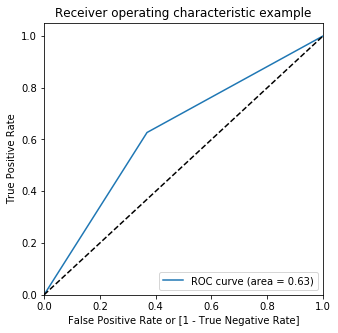

In [55]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

y_pred1=pd.DataFrame(logwoe.predict_proba(x_train[col_woe]))[[1]]
y_pred1.rename(columns={1:'predicted'}, inplace=True)
y_pred1['predicted']=y_pred1.predicted.map(lambda x: 1 if x > 0.52 else 0)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred1['predicted'], drop_intermediate = False )
draw_roc(y_train, y_pred1['predicted'])

##### The Area under curve is 63% hence this model gives accuracy of 63%")

#### We have tried Decision Tree,  Random Forest and SVM but none is giving better metrices than LogisticRegression

### Application Score Using Logistic Regression Model

In [55]:
logwoe=LogisticRegression(class_weight='balanced', C=10, tol = 0.01)
logwoe.fit(x_train[col_woe], y_train)

print("Accuracy Score",accuracy_score(y_test_woe, logwoe.predict(x_test_woe[col_woe])))

Accuracy Score 0.608097258859961


In [56]:
####dropping "perf_tag" from rejected dataset
crdemo_woe_rejected.drop('perf_tag', axis=1, inplace=True)

In [57]:
####joining the two datasets 1. main data set and 2. rejected applicant data set
###crdemo_rej_woe=pd.concat([woe_x,crdemo_woe_rejected], axis=0)
crdemo_rej_woe=woe_x.append(crdemo_woe_rejected)
crdemo_rej_woe.head()

age    gender  marital_status  no_dependent    income  education  \
0  0.031946  0.032490       -0.004137     -0.084069 -0.276120   0.016625   
1 -0.008094 -0.010249       -0.004137     -0.025991 -0.386094  -0.017571   
2  0.030538 -0.010249        0.023640     -0.084069 -0.169899   0.016625   
3 -0.045283 -0.010249       -0.004137      0.040754 -0.386094   0.016625   
4  0.030538  0.032490       -0.004137      0.003611 -0.169899  -0.017571   

   profession  type_res  month_res  month_comp  ...    trad_6   trad_12  \
0   -0.027884 -0.004471  -0.068902   -0.227980  ... -0.543234 -0.815675   
1   -0.014373 -0.004471  -0.068902   -0.178133  ... -0.543234 -0.815675   
2   -0.014373 -0.004471  -0.068902   -0.205447  ... -0.543234 -0.895068   
3    0.091158 -0.004471   0.128064   -0.205447  ... -0.543234 -0.895068   
4   -0.027884 -0.004471  -0.068902   -0.178133  ... -0.543234 -0.895068   

   pl_trad_6  pl_trad_12    inqu_6   inqu_12   open_hl    out_bal  \
0  -0.649303   -0.686738 -0.319921 -0.828593 -0.237237  2999395.0   
1  -0.649303   -0.686738 -0.319921 -0.828593  0.071859     3078.0   
2  -0.649303   -0.686738 -0.319921 -0.828593 -0.237237  3004972.0   
3  -0.649303   -0.686738 -0.319921 -0.828593 -0.237237  3355373.0   
4  -0.649303   -0.686738 -0.319921 -0.828593 -0.237237  3014283.0   

   total_no_trad   open_al  
0      -0.446637  0.011890  
1     -0.0485536  0.011890  
2      -0.880961  0.011890  
3      -0.446637 -0.137309  
4      -0.446637  0.011890  

[5 rows x 27 columns]

In [58]:
crdemo_rej_woe.columns

Index(['age', 'gender', 'marital_status', 'no_dependent', 'income',
       'education', 'profession', 'type_res', 'month_res', 'month_comp',
       'dpd_90_6', 'dpd_60_6', 'dpd_30_6', 'dpd_90_12', 'dpd_60_12',
       'dpd_30_12', 'util_12', 'trad_6', 'trad_12', 'pl_trad_6', 'pl_trad_12',
       'inqu_6', 'inqu_12', 'open_hl', 'out_bal', 'total_no_trad', 'open_al'],
      dtype='object')

In [59]:
## predicting probability of the all applicants

probability=pd.DataFrame(logwoe.predict_proba(crdemo_rej_woe[col_woe]))[[1]]
probability.rename(columns={1:'probability'}, inplace=True)


points_to_double_odds=20
odds=10
factor=points_to_double_odds/np.log(2)
score_10_to_1_odd=400
offset=score_10_to_1_odd-(factor*np.log(odds))
probability['default_prob']=probability['probability']
probability['app_score']=probability['probability'].map(lambda x : round((offset + factor*np.log(x/(1-x))),2))


crdemo_final1=crdemo_final.reset_index(drop=True)
probability1=probability.reset_index(drop=True)
crdemo_score=pd.concat([crdemo_final1,probability1[['app_score','default_prob']]], axis=1)


In [60]:
print(crdemo_score.app_score.min())
print(crdemo_score.app_score.max())

###cut off score
points_to_double_odds=20
odds=10
factor=points_to_double_odds/np.log(2)
score_10_to_1_odd=400
offset=score_10_to_1_odd-(factor*np.log(odds))
###from ROC graph
cutoff_prob = 0.52
cutoff_score = offset + factor*np.log(cutoff_prob/(1-cutoff_prob))
cutoff_score

297.63
367.46


335.87098245065147

In [61]:
### analysis for rejected population 
crdemo_score["customer_type"]=crdemo_score["app_score"].map(lambda x: "Good" if x>cutoff_score else "Bad")
crdemo_score_rejected=crdemo_score[crdemo_score['perf_tag']==-1]
crdemo_score_rejected.customer_type.value_counts()

Good    1416
Bad        8
Name: customer_type, dtype: int64

In [62]:
# Credit score compariosn of Rejected and Approved population
# to check whether our model also gives same result
# from the below results it is clear that out of 1424 rejected applicants just 8 fall below the cutoff credit score/bad segment
#  
print("Actual distribution of BAD Customers")
print("Total BAD Customers ", len(crdemo_score[crdemo_score["customer_type"]=="Bad"]), 
      "Which is ",round((len(crdemo_score[crdemo_score["customer_type"]=="Bad"])/len(crdemo_score))*100,2), "% of total number of customers")
print(crdemo_score[crdemo_score["customer_type"]=="Bad"].perf_tag.value_counts())
print(" ")
print("This model is able to predict ", round(1093*100/(1093+1853),2), "%  of defaulters")
print(" ")
print(" ")
print("Actual distribution of Good Customers")
print("Total Good Customers ", len(crdemo_score[crdemo_score["customer_type"]=="Good"]), 
      "Which is ",round((len(crdemo_score[crdemo_score["customer_type"]=="Good"])/len(crdemo_score))*100,2), "% of total number of customers")
print(crdemo_score[crdemo_score["customer_type"]=="Good"].perf_tag.value_counts())

Actual distribution of BAD Customers
Total BAD Customers  43476 Which is  61.08 % of total number of customers
 0    42375
 1     1093
-1        8
Name: perf_tag, dtype: int64
 
This model is able to predict  37.1 %  of defaulters
 
 
Actual distribution of Good Customers
Total Good Customers  27698 Which is  38.92 % of total number of customers
 0    24429
 1     1853
-1     1416
Name: perf_tag, dtype: int64


## Rejected Applicants
#### As per the model most of the The Rejected applicants are good customers and could not have defaulted 

## Expected Credit Loss

In [77]:
## Financial Implications for the Company, CredX
## Our model correctly predicted 1093 Applicants, who defaulted
## Assume that company expects to recover 40% of outstanding balance from the defaulter
recovery=0.40
bad_predicted = crdemo_score[(crdemo_score["customer_type"]=="Bad") & (crdemo_score["perf_tag"]==1)]
bad_predicted["Expected_Loss"] = bad_predicted.default_prob*bad_predicted["out_bal"]*(1-recovery)

Total_Expected_Loss = round(bad_predicted["Expected_Loss"].sum(),2)

print("Total expected credit loss ", Total_Expected_Loss)
print("By deploying this model the company can save a credit loss of  {}  Million Bucks".format(round((Total_Expected_Loss/1000000),2)))

Total expected credit loss  342735095.76
By deploying this model the company can save a credit loss of  342.74  Million Bucks


## Revenue Loss due to the Model Deployment

In [82]:
### To estimate Revenue loss lets assume following things
### Assume that we consider only number of times "30 DPD in Last 12 months"
### Assume current outstanding balance as the average outstanding balance over last 12 months
### Assume that average 300 bucks is the renewal FEE for each customer
### Assume 39% Rate of Interest on the outstanding balance 
ROI = 0.39
Renewal_Fee = 300
###datasets of customers where they did not default but model rejected
non_default_rejected = crdemo_score[(crdemo_score["customer_type"]=="Bad") & (crdemo_score["perf_tag"]==0)]
###interest calculation
non_default_rejected['interest'] = non_default_rejected.out_bal * (0.39*30/365) * non_default_rejected.dpd_30_12

total_revenue_loss = round(non_default_rejected['interest'].sum() + len(non_default_rejected)*300,2)

print("Total expected credit loss ", total_revenue_loss)
printmd("By deploying this model the company can save a credit loss of  {}  Million Bucks".format(round((total_revenue_loss/1000000),2)))

Total expected credit loss  205478581.36


By deploying this model the company can save a credit loss of  205.48  Million Bucks

## Net Saving for the company

In [81]:
net_saving = round(Total_Expected_Loss - total_revenue_loss,2)
print("Net saving for the company is ", net_saving, " Bucks" )
printmd("By deploying this model the company's net saving is 137.23 Million Bucks".format(round((net_saving/1000000),2)))

Net saving for the company is  137256514.4  Bucks


By deploying this model the company's net saving is 137.23 Million Bucks

## Random Forest

#### Random Forest, SVM and Decision Tree model are giving 0 recall, which is the correct metrces for the current scenerio so these models are not fit for the prediction. Hence we must go with Logistic Regression

In [56]:
crdemo_rf_all=crdemo.copy()

In [57]:
crdemo_rf_all=crdemo.copy()
objects=['gender','marital_status','education','profession','type_res']
for i in objects:
    dummy_data=pd.DataFrame()
    dummy_data = pd.get_dummies((crdemo_rf_all[i]), drop_first=True, prefix = i)
    crdemo_rf_all.drop(i, axis=1, inplace=True)
    crdemo_rf_all=pd.concat([crdemo_rf_all, dummy_data], axis=1)
    
crdemo_rf_reject=crdemo_rf_all[crdemo_rf_all['perf_tag']==-1]
crdemo_rf=crdemo_rf_all[crdemo_rf_all['perf_tag']!=-1]
crdemo_rf_x=crdemo_rf.drop("perf_tag", axis=1)
crdemo_rf_y=crdemo_rf['perf_tag']

In [58]:
from sklearn.model_selection import train_test_split
x_train_rf, x_test_rf, y_train_rf, y_test_rf=train_test_split(crdemo_rf_x, crdemo_rf_y, test_size=0.3, random_state=25)

In [76]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10], 'max_features': [5,15,27]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rff = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3,scoring="recall", n_jobs = -1)

rff.fit(x_train_rf,y_train_rf)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [77]:
print(rff.best_score_)
print(rff.best_params_)

0.0
{'max_depth': 5, 'max_features': 5}


In [78]:
rf = RandomForestClassifier(max_depth= 5, max_features= 5, n_estimators=100)
rf.fit(x_train_rf,y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

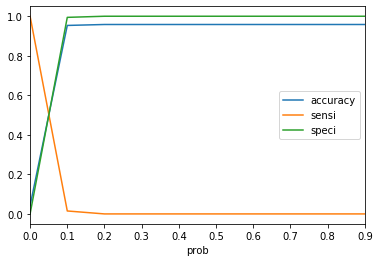

      prob  accuracy     sensi     speci
0.00  0.00  0.041720  1.000000  0.000000
0.10  0.10  0.953501  0.014891  0.994365
0.20  0.20  0.958280  0.000000  1.000000
0.25  0.25  0.958280  0.000000  1.000000
0.30  0.30  0.958280  0.000000  1.000000
0.35  0.35  0.958280  0.000000  1.000000
0.40  0.40  0.958280  0.000000  1.000000
0.45  0.45  0.958280  0.000000  1.000000
0.50  0.50  0.958280  0.000000  1.000000
0.51  0.51  0.958280  0.000000  1.000000
0.52  0.52  0.958280  0.000000  1.000000
0.53  0.53  0.958280  0.000000  1.000000
0.54  0.54  0.958280  0.000000  1.000000
0.55  0.55  0.958280  0.000000  1.000000
0.60  0.60  0.958280  0.000000  1.000000
0.65  0.65  0.958280  0.000000  1.000000
0.70  0.70  0.958280  0.000000  1.000000
0.75  0.75  0.958280  0.000000  1.000000
0.80  0.80  0.958280  0.000000  1.000000
0.85  0.85  0.958280  0.000000  1.000000
0.90  0.90  0.958280  0.000000  1.000000
  
Confusion Matrix 
[[20052     0]
 [  873     0]]
  
Accuracy Score 
0.9582795698924731
  
 Clas

In [79]:
x_test=x_test_rf
y_test=y_test_rf

y_pred=pd.DataFrame(rf.predict_proba(x_test))[[1]]
y_pred.rename(columns={1:'predicted'}, inplace=True)

numbers = [0.0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in numbers:
    y_pred[i]= y_pred.predicted.map(lambda x: 1 if x > i else 0)

cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in num:
    cm = confusion_matrix(y_test,y_pred[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]

cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()
print(cutoff)
print('  ')
print('Confusion Matrix ')
y_pred_final=y_pred[['predicted']]
y_pred_final['predicted']=y_pred_final.predicted.map(lambda x: 1 if x > 0.65 else 0)
print(confusion_matrix(y_test, y_pred_final))
print('  ')
print('Accuracy Score ')
print(accuracy_score(y_test, y_pred_final))
print('  ')
print(' Classification Report ')
print(classification_report(y_test, y_pred_final))

### Decision Tree Classfier

In [80]:
from sklearn.tree import DecisionTreeClassifier

crdemo_rf_all=crdemo.copy()
objects=['gender','marital_status','education','profession','type_res']
for i in objects:
    dummy_data=pd.DataFrame()
    dummy_data = pd.get_dummies((crdemo_rf_all[i]), drop_first=True, prefix = i)
    crdemo_rf_all.drop(i, axis=1, inplace=True)
    crdemo_rf_all=pd.concat([crdemo_rf_all, dummy_data], axis=1)
    
crdemo_rf_reject=crdemo_rf_all[crdemo_rf_all['perf_tag']==-1]
crdemo_rf=crdemo_rf_all[crdemo_rf_all['perf_tag']!=-1]
crdemo_rf_x=crdemo_rf.drop("perf_tag", axis=1)
crdemo_rf_y=crdemo_rf['perf_tag']

from sklearn.model_selection import train_test_split
x_train_rf, x_test_rf, y_train_rf, y_test_rf=train_test_split(crdemo_rf_x, crdemo_rf_y, test_size=0.3, random_state=25)

In [81]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10], 'max_features': [5,15,27]
}
# Create a based model
rf = DecisionTreeClassifier()
# Instantiate the grid search model
rff = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3,scoring="recall", n_jobs = -1)

rff.fit(x_train_rf,y_train_rf)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [5, 15, 27]},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [82]:
print(rff.best_score_)
print(rff.best_params_)

0.013506994693680656
{'max_depth': 10, 'max_features': 27}


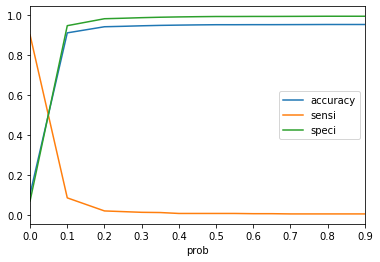

      prob  accuracy     sensi     speci
0.00  0.00  0.106237  0.900344  0.071664
0.10  0.10  0.911446  0.087056  0.947337
0.20  0.20  0.941983  0.021764  0.982047
0.25  0.25  0.944182  0.018328  0.984490
0.30  0.30  0.946762  0.014891  0.987333
0.35  0.35  0.948817  0.013746  0.989527
0.40  0.40  0.950155  0.009164  0.991123
0.45  0.45  0.951254  0.009164  0.992270
0.50  0.50  0.952115  0.009164  0.993168
0.51  0.51  0.952115  0.009164  0.993168
0.52  0.52  0.952115  0.009164  0.993168
0.53  0.53  0.952115  0.009164  0.993168
0.54  0.54  0.952115  0.009164  0.993168
0.55  0.55  0.952115  0.009164  0.993168
0.60  0.60  0.952401  0.008018  0.993517
0.65  0.65  0.952401  0.008018  0.993517
0.70  0.70  0.952640  0.006873  0.993816
0.75  0.75  0.952927  0.006873  0.994115
0.80  0.80  0.953262  0.006873  0.994464
0.85  0.85  0.953262  0.006873  0.994464
0.90  0.90  0.953262  0.006873  0.994464
  
Confusion Matrix 
[[19922   130]
 [  866     7]]
  
Accuracy Score 
0.9524014336917562
  
 Clas

In [83]:
rf = DecisionTreeClassifier(max_depth= 10, max_features= 27)
rf.fit(x_train_rf,y_train_rf)

x_test=x_test_rf
y_test=y_test_rf

y_pred=pd.DataFrame(rf.predict_proba(x_test))[[1]]
y_pred.rename(columns={1:'predicted'}, inplace=True)

numbers = [0.0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in numbers:
    y_pred[i]= y_pred.predicted.map(lambda x: 1 if x > i else 0)

cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in num:
    cm = confusion_matrix(y_test,y_pred[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]

cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()
print(cutoff)
print('  ')
print('Confusion Matrix ')
y_pred_final=y_pred[['predicted']]
y_pred_final['predicted']=y_pred_final.predicted.map(lambda x: 1 if x > 0.65 else 0)
print(confusion_matrix(y_test, y_pred_final))
print('  ')
print('Accuracy Score ')
print(accuracy_score(y_test, y_pred_final))
print('  ')
print(' Classification Report ')
print(classification_report(y_test, y_pred_final))

## Support Vector

In [17]:
from sklearn.svm import SVC

In [18]:
crdemo_rf_all=crdemo.copy()
objects=['gender','marital_status','education','profession','type_res']
for i in objects:
    dummy_data=pd.DataFrame()
    dummy_data = pd.get_dummies((crdemo_rf_all[i]), drop_first=True, prefix = i)
    crdemo_rf_all.drop(i, axis=1, inplace=True)
    crdemo_rf_all=pd.concat([crdemo_rf_all, dummy_data], axis=1)
    
crdemo_rf_reject=crdemo_rf_all[crdemo_rf_all['perf_tag']==-1]
crdemo_rf=crdemo_rf_all[crdemo_rf_all['perf_tag']!=-1]
crdemo_rf_x=crdemo_rf.drop("perf_tag", axis=1)
crdemo_rf_y=crdemo_rf['perf_tag']

from sklearn.model_selection import train_test_split
x_train_rf, x_test_rf, y_train_rf, y_test_rf=train_test_split(crdemo_rf_x, crdemo_rf_y, test_size=0.3, random_state=25)

In [19]:
from sklearn.preprocessing import scale
X_train=scale(x_train_rf)
X_test=scale(x_test_rf)
y_train=y_train_rf
y_test=y_test_rf

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

model_linear = SVC(kernel='linear', class_weight= 'balanced', probability=True)
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

### this model is giving 59% accuracy and 67% Recall/ Sensitivity

accuracy: 0.5891039426523298 

[[11737  8315]
 [  283   590]]


In [95]:
model_rbf = SVC(kernel='rbf', class_weight= 'balanced')
model_rbf.fit(X_train, y_train)

# predict
y_pred = model_rbf.predict(X_test)


# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

### this model is giving 71% accuracy and 43% Recall/ Sensitivity

accuracy: 0.7135483870967742 

[[14554  5498]
 [  496   377]]


In [87]:
model_rbf = SVC(kernel='rbf', class_weight= 'balanced',C=10, gamma= 0.01 )
model_rbf.fit(X_train, y_train)

# predict
y_pred = model_rbf.predict(X_test)


# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
### this model is giving 71% accuracy and 49% Recall/ Sensitivity

accuracy: 0.6860692951015531 

[[13928  6124]
 [  445   428]]


In [55]:
y_pred=pd.DataFrame(model_linear.predict_proba(X_test))[[1]]

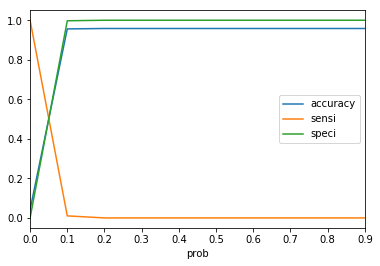

      prob  accuracy     sensi     speci
0.00  0.00  0.041720  1.000000  0.000000
0.10  0.10  0.956129  0.010309  0.997307
0.20  0.20  0.958280  0.000000  1.000000
0.25  0.25  0.958280  0.000000  1.000000
0.30  0.30  0.958280  0.000000  1.000000
0.35  0.35  0.958280  0.000000  1.000000
0.40  0.40  0.958280  0.000000  1.000000
0.45  0.45  0.958280  0.000000  1.000000
0.50  0.50  0.958280  0.000000  1.000000
0.51  0.51  0.958280  0.000000  1.000000
0.52  0.52  0.958280  0.000000  1.000000
0.53  0.53  0.958280  0.000000  1.000000
0.54  0.54  0.958280  0.000000  1.000000
0.55  0.55  0.958280  0.000000  1.000000
0.60  0.60  0.958280  0.000000  1.000000
0.65  0.65  0.958280  0.000000  1.000000
0.70  0.70  0.958280  0.000000  1.000000
0.75  0.75  0.958280  0.000000  1.000000
0.80  0.80  0.958280  0.000000  1.000000
0.85  0.85  0.958280  0.000000  1.000000
0.90  0.90  0.958280  0.000000  1.000000
  
Confusion Matrix 
[[11592  8460]
 [  276   597]]
  
Accuracy Score 
0.5825089605734767
  
 Clas

In [60]:
y_pred.rename(columns={1:'predicted'}, inplace=True)

numbers = [0.0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in numbers:
    y_pred[i]= y_pred.predicted.map(lambda x: 1 if x > i else 0)

cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in num:
    cm = confusion_matrix(y_test,y_pred[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]

cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()
print(cutoff)
print('  ')
print('Confusion Matrix ')
y_pred_final=y_pred[['predicted']]
y_pred_final['predicted']=y_pred_final.predicted.map(lambda x: 1 if x > 0.044 else 0)
print(confusion_matrix(y_test, y_pred_final))
print('  ')
print('Accuracy Score ')
print(accuracy_score(y_test, y_pred_final))
print('  ')
print(' Classification Report ')
print(classification_report(y_test, y_pred_final))

### Support vector is able to give good Recall 0.67, but it is not giving a clear cutoff value and most of the probabilities are less than 0.21